In [8]:
!pip install hypernetx
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# No.of Nodes daywise


2015-10-27: 4
Progress: 0.04% (1/2547)
2016-02-01: 2
Progress: 0.08% (2/2547)
2016-02-04: 4
Progress: 0.12% (3/2547)
2016-02-09: 8
Progress: 0.16% (4/2547)
2016-02-11: 9
Progress: 0.20% (5/2547)
2016-02-12: 3
Progress: 0.24% (6/2547)
2016-02-13: 3
Progress: 0.27% (7/2547)
2016-02-14: 4
Progress: 0.31% (8/2547)
2016-02-15: 6
Progress: 0.35% (9/2547)
2016-02-16: 4
Progress: 0.39% (10/2547)
2016-02-17: 4
Progress: 0.43% (11/2547)
2016-02-18: 10
Progress: 0.47% (12/2547)
2016-02-19: 3
Progress: 0.51% (13/2547)
2016-02-20: 7
Progress: 0.55% (14/2547)
2016-02-21: 8
Progress: 0.59% (15/2547)
2016-02-22: 5
Progress: 0.63% (16/2547)
2016-02-23: 3
Progress: 0.67% (17/2547)
2016-02-25: 3
Progress: 0.71% (18/2547)
2016-02-26: 6
Progress: 0.75% (19/2547)
2016-02-27: 3
Progress: 0.79% (20/2547)
2016-02-28: 3
Progress: 0.82% (21/2547)
2016-02-29: 2
Progress: 0.86% (22/2547)
2016-03-01: 5
Progress: 0.90% (23/2547)
2016-03-02: 3
Progress: 0.94% (24/2547)
2016-03-03: 3
Progress: 0.98% (25/2547)
2016-03-

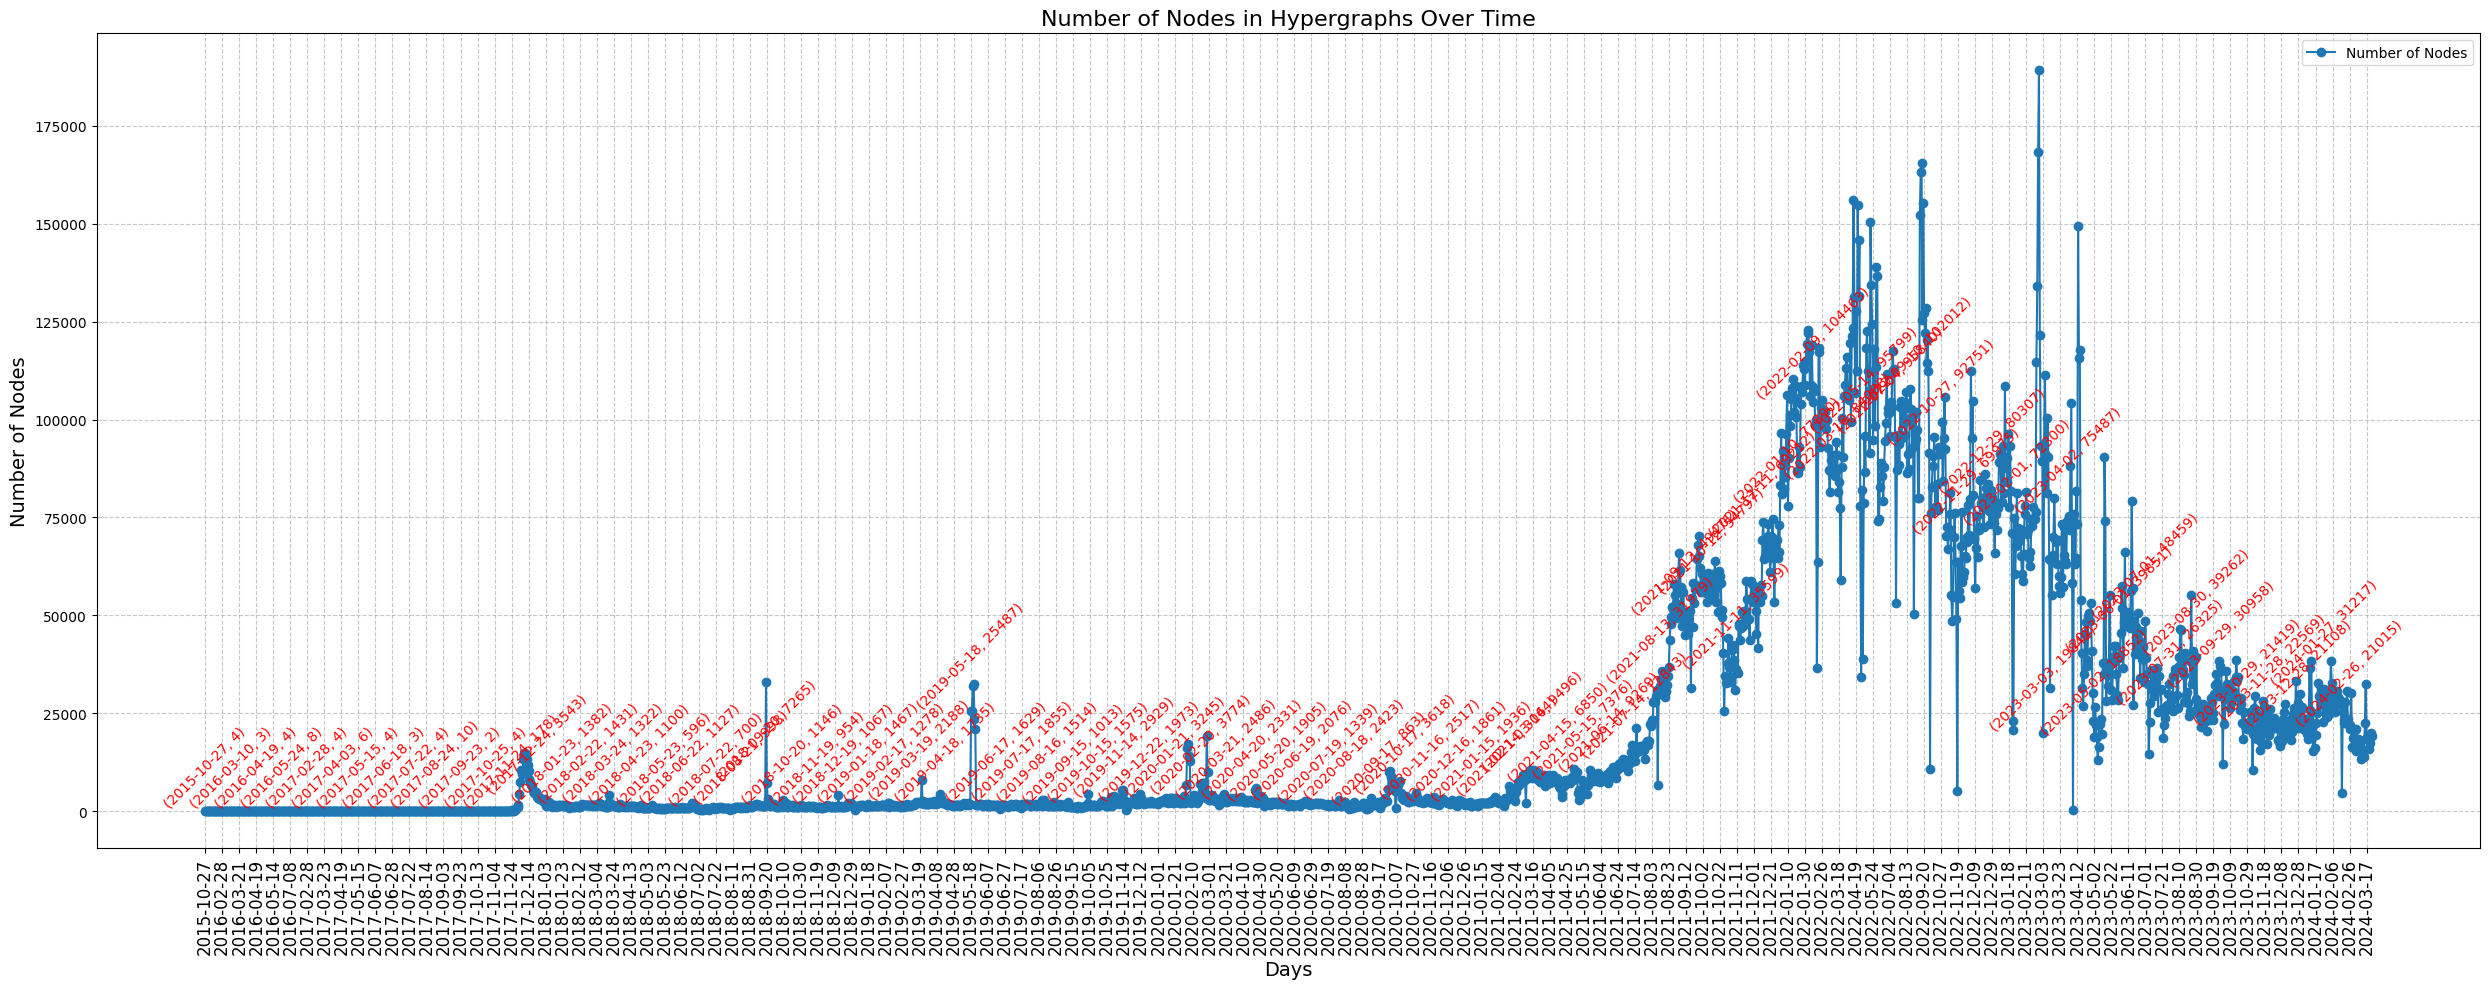

In [3]:
import os
import pandas as pd
import hypernetx as hnx
import matplotlib.pyplot as plt
import json

# Define the input directory for labeled files
labeled_dir = r'/home/prio/loc_project/Mini_2_ERC_721/labelling_out'

# Define the output file paths
output_file_csv = r'/home/prio/loc_project/Mini_2_ERC_721/num_nodes_per_day.csv'
output_file_json = r'/home/prio/loc_project/Mini_2_ERC_721/processed_files_nodes.json'

# Load processed files data
if os.path.exists(output_file_json):
    with open(output_file_json, 'r') as f:
        processed_files = json.load(f)
else:
    processed_files = {}

# Initialize a list to store the number of nodes for each day
num_nodes_per_day = []

# Get the list of files to process
csv_files = sorted([f for f in os.listdir(labeled_dir) if f.endswith('.csv')])

# Process each CSV file in the labeled directory
for i, filename in enumerate(csv_files):
    if filename in processed_files:
        print(f"Skipping already processed file: {filename}")
        continue

    file_path = os.path.join(labeled_dir, filename)
    
    df = pd.read_csv(file_path)
    
    # Initialize a dictionary to store the hyperedges for the current day
    hyperedges = {}
    
    # Group by 'tokenAddressLabel' to create hyperedges
    for token, group in df.groupby('tokenAddressLabel'):
        hyperedges[token] = set(group['fromLabel']).union(set(group['toLabel']))
    
    # Create the hypergraph for the current day
    H = hnx.Hypergraph(hyperedges)
    
    # Get the number of nodes in the current hypergraph
    num_nodes = len(H.nodes)
    edge_name = filename.replace('.csv', '')
    num_nodes_per_day.append((edge_name, num_nodes))
    
    # Save the processed file information
    processed_files[filename] = num_nodes
    
    # Print the number of nodes for the current day
    print(f"{edge_name}: {num_nodes}")
    
    # Print progress
    progress = (i + 1) / len(csv_files) * 100
    print(f"Progress: {progress:.2f}% ({i + 1}/{len(csv_files)})")

# Save the processed files data to a JSON file
with open(output_file_json, 'w') as f:
    json.dump(processed_files, f, indent=4)

# Save the calculated data to a CSV file
df_output = pd.DataFrame(num_nodes_per_day, columns=['Day', 'Number of Nodes'])
df_output.to_csv(output_file_csv, index=False)

# Sort the number of nodes by day
num_nodes_per_day.sort()

# Extract the days and corresponding number of nodes
days = [day for day, _ in num_nodes_per_day]
num_nodes = [nodes for _, nodes in num_nodes_per_day]

# Plot the number of nodes over time with improved readability
plt.figure(figsize=(25, 10))  # Increase the figure size for better readability
plt.plot(range(len(days)), num_nodes, marker='o', linestyle='-', color='#1f77b4', label='Number of Nodes')  # Brighter blue color

plt.xlabel('Days', fontsize=14)
plt.ylabel('Number of Nodes', fontsize=14)
plt.title('Number of Nodes in Hypergraphs Over Time', fontsize=16)

# Selectively label x-axis ticks
selected_indices = list(range(0, len(days), 20))  # Label every 20th day

plt.xticks(
    ticks=selected_indices,  # Set the selected indices
    labels=[days[idx] for idx in selected_indices],  # Set corresponding day names as labels
    fontsize=12,  # Font size for x-tick labels
    rotation=90  # Rotate labels for better readability
)

# Annotate points (days, num_nodes)
for i, (day, nodes) in enumerate(num_nodes_per_day):
    if i % 30 == 0:  # Annotate every 30th point for clarity
        plt.text(i, nodes, f'({day}, {nodes})', fontsize=10, ha='center', va='bottom', rotation=45, color='red')

plt.tight_layout()  # Adjust layout to fit labels

# Optional: Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Add a legend
plt.legend()

# Display the plot
plt.show()


Total Number of Unique Nodes: 7832122


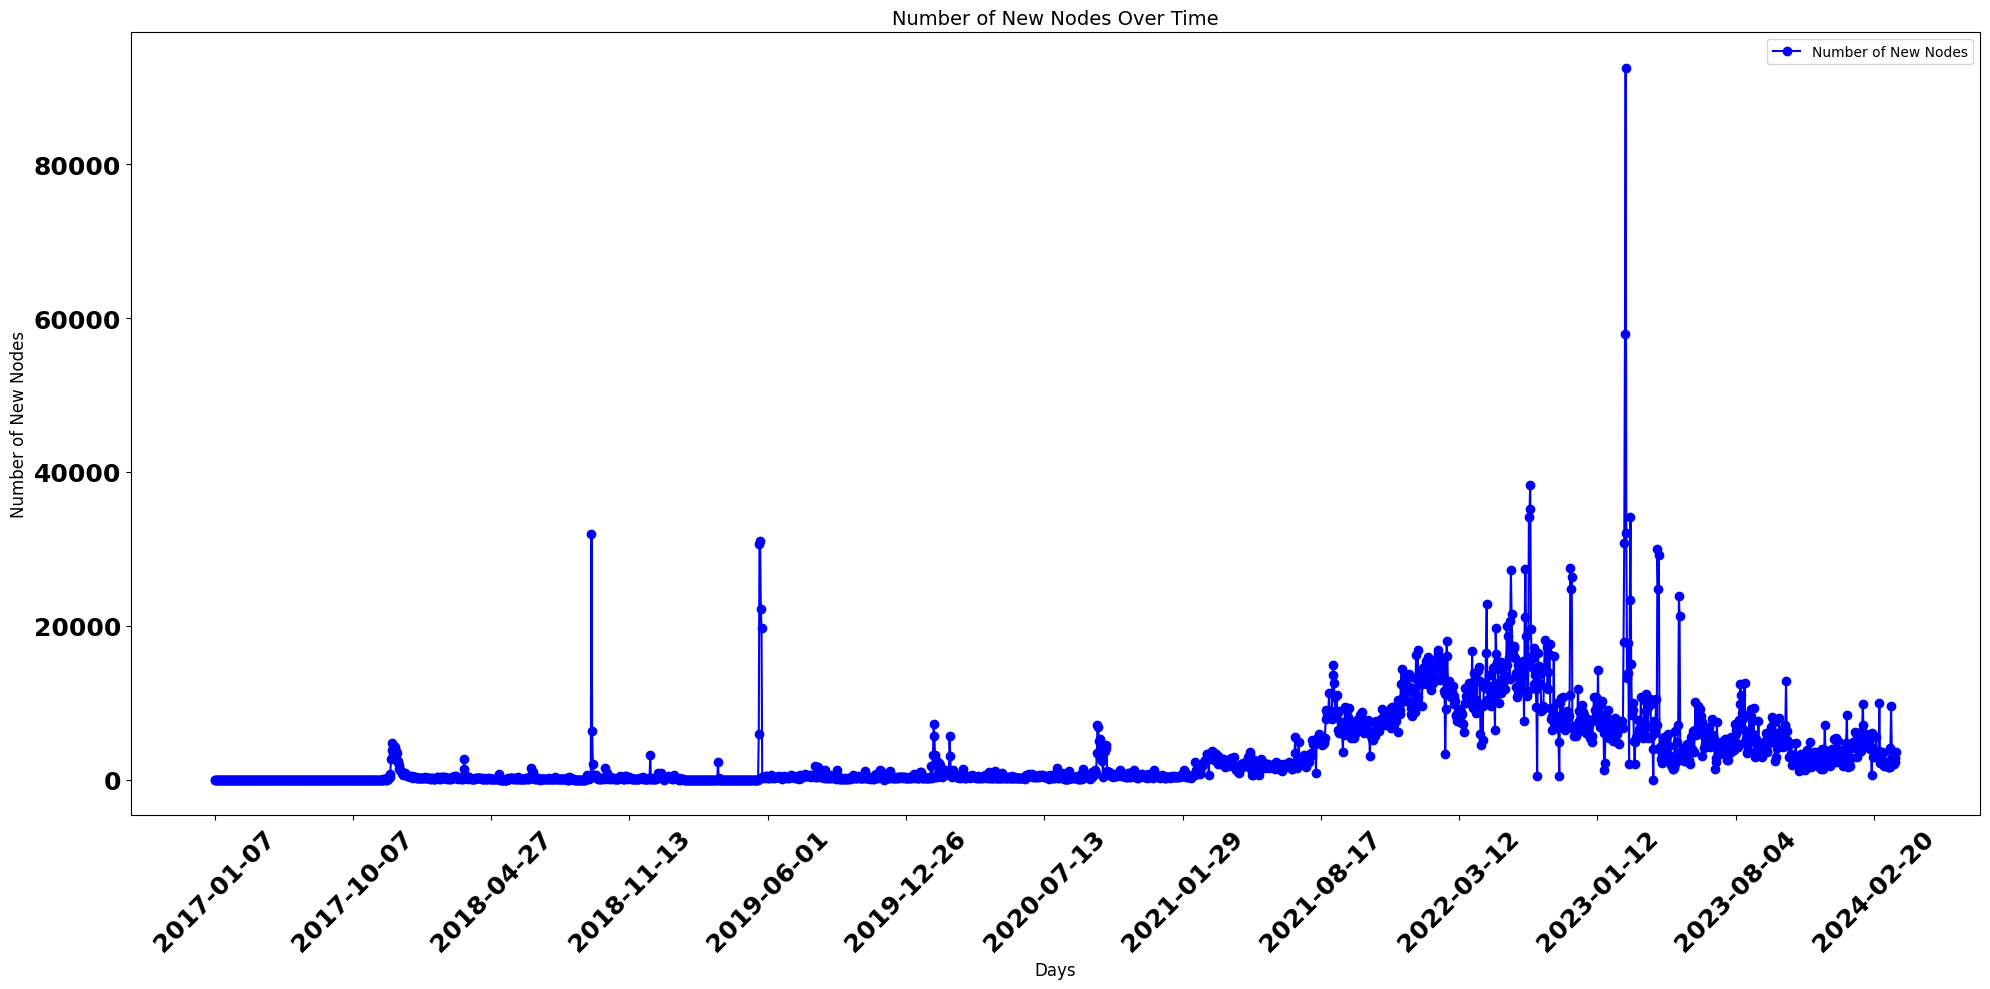

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
file_path = r'D:\Desktop\SEM 7\MINI_2_2017\new_csv_data_2017\new_nodes.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Calculate the total number of unique nodes (total new nodes)
total_unique_nodes = df['Number_of_New_Nodes'].sum()
print(f"Total Number of Unique Nodes: {total_unique_nodes}")

# Convert the 'Day' column to datetime format for proper handling
df['Day'] = pd.to_datetime(df['Day'])

# Sort data by the 'Day' column
df.sort_values(by='Day', inplace=True)

# Create a new index based on the number of days since the first date for plotting
days_index = np.arange(len(df))  # Index based on the length of the data

# Plotting the line graph
plt.figure(figsize=(20, 10))  # Set figure size
plt.plot(days_index, df['Number_of_New_Nodes'].values, marker='o', linestyle='-', color='b', label='Number of New Nodes')

# Set x-axis labels every 200 days
step_size = 200  # Set the step size for x-axis labels
selected_indices = list(range(0, len(df), step_size))  # Select indices spaced by step_size

# Set x-axis ticks and labels
plt.xticks(
    ticks=selected_indices,
    labels=df['Day'].dt.strftime('%Y-%m-%d').iloc[selected_indices],  # Format the date labels
    rotation=45,
    fontsize=18,
    fontweight='bold'
)

plt.yticks(fontsize=18,fontweight='bold')

# Set labels and title
plt.xlabel('Days', fontsize=12)
plt.ylabel('Number of New Nodes', fontsize=12)
plt.title('Number of New Nodes Over Time', fontsize=14)

# Disable grid
plt.grid(False)

# Add a legend
plt.legend()

# Adjust the layout to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()


Total Number of Unique Nodes: 53236797


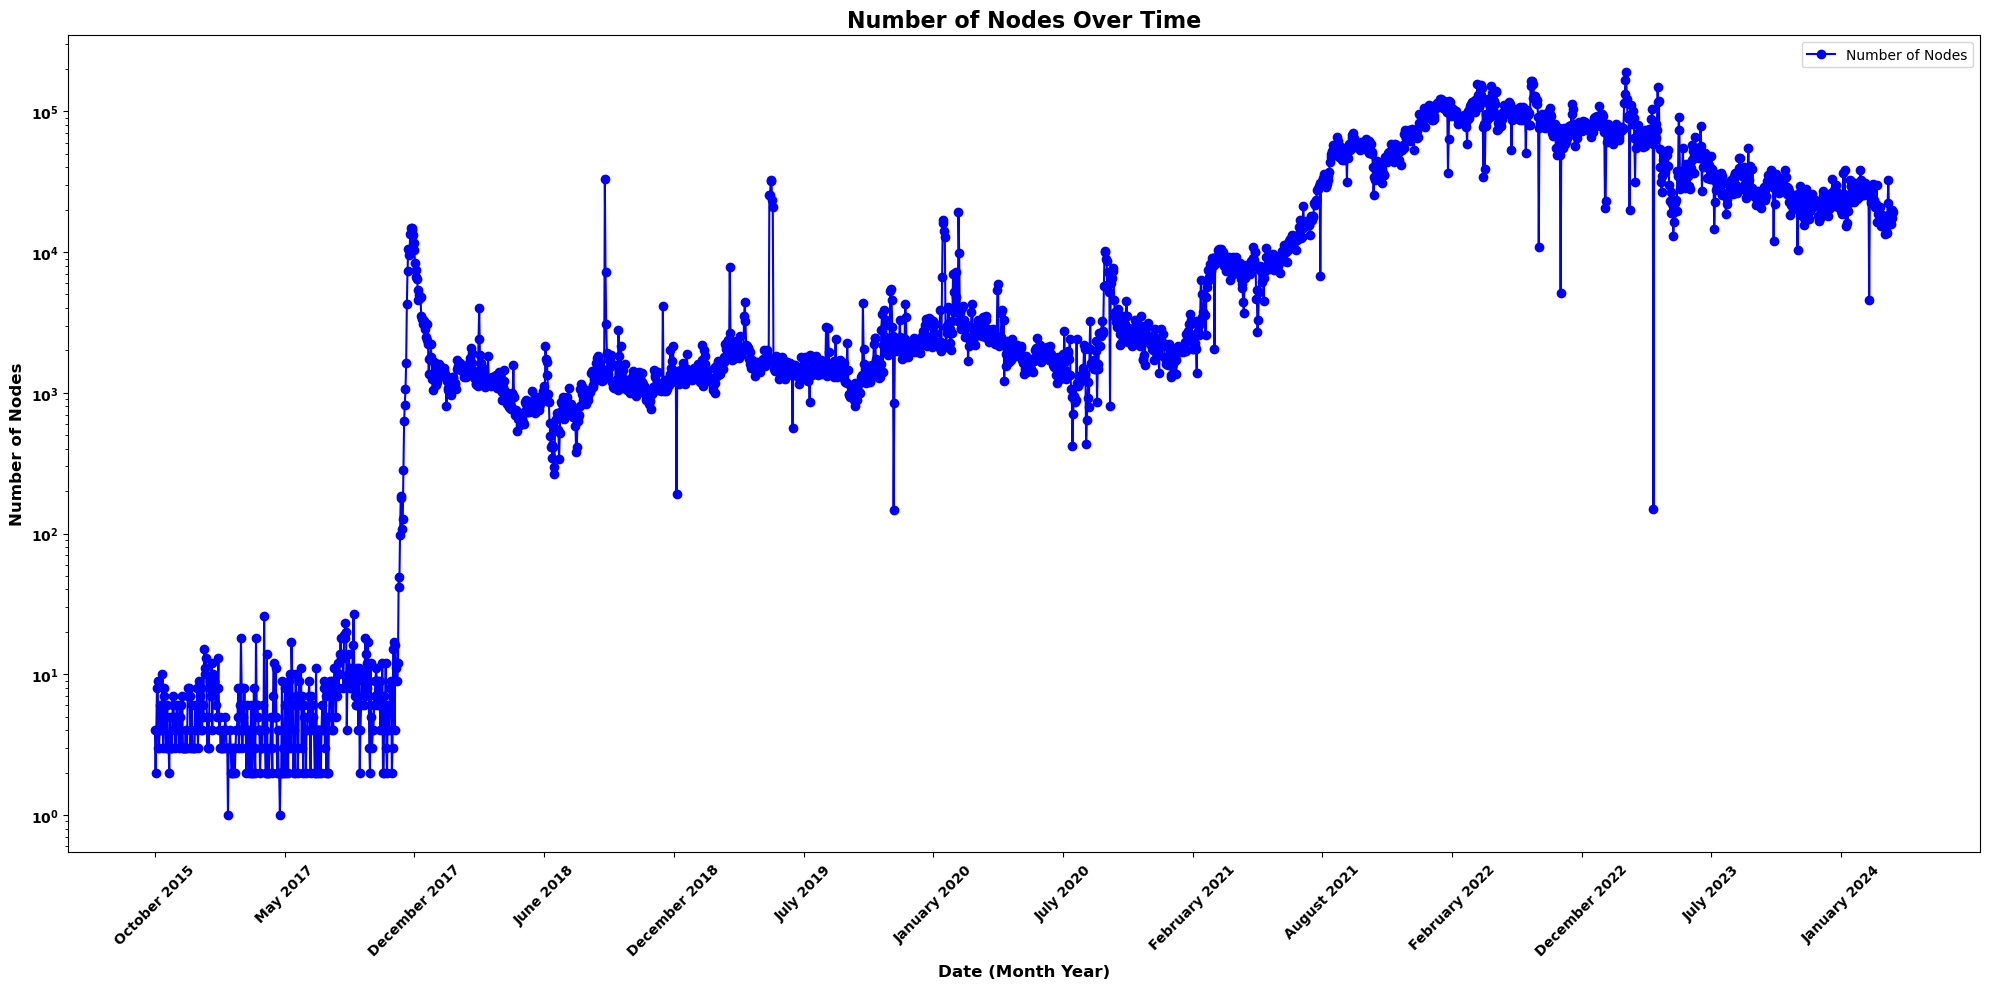

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
file_path = '/home/prio/loc_project/Mini_2_ERC_721/csv_data/num_nodes_per_day.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Calculate the total number of unique nodes (total new nodes)
total_unique_nodes = df['Number of Nodes'].sum()
print(f"Total Number of Unique Nodes: {total_unique_nodes}")

# Convert the 'Day' column to datetime format for proper handling
df['Day'] = pd.to_datetime(df['Day'])

# Sort data by the 'Day' column
df.sort_values(by='Day', inplace=True)

# Create a new index based on the number of days since the first date for plotting
days_index = np.arange(len(df))  # Index based on the length of the data

# Plotting the line graph
plt.figure(figsize=(20, 10))  # Set figure size
plt.plot(days_index, df['Number of Nodes'].values, marker='o', linestyle='-', color='b', label='Number of Nodes')

# Set x-axis labels every 190 days
step_size = 190  # Set the step size for x-axis labels
selected_indices = list(range(0, len(df), step_size))  # Select indices spaced by step_size

# Set x-axis ticks and labels with month and year in bold
plt.xticks(
    ticks=selected_indices,
    labels=df['Day'].dt.strftime('%B %Y').iloc[selected_indices],  # Format the date as 'Month Year'
    rotation=45,
    fontsize=10,
    fontweight='bold'  # Set the font to bold
)

plt.yticks(
    fontweight='bold'
)

# Set labels and title
plt.xlabel('Date (Month Year)', fontsize=12, fontweight='bold')
plt.ylabel('Number of Nodes', fontsize=12, fontweight='bold')
plt.title('Number of Nodes Over Time', fontsize=16, fontweight='bold')

# Set y-axis scale to logarithmic
plt.yscale('log')

# Disable grid
plt.grid(False)

# Add a legend
plt.legend()

# Adjust the layout to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()


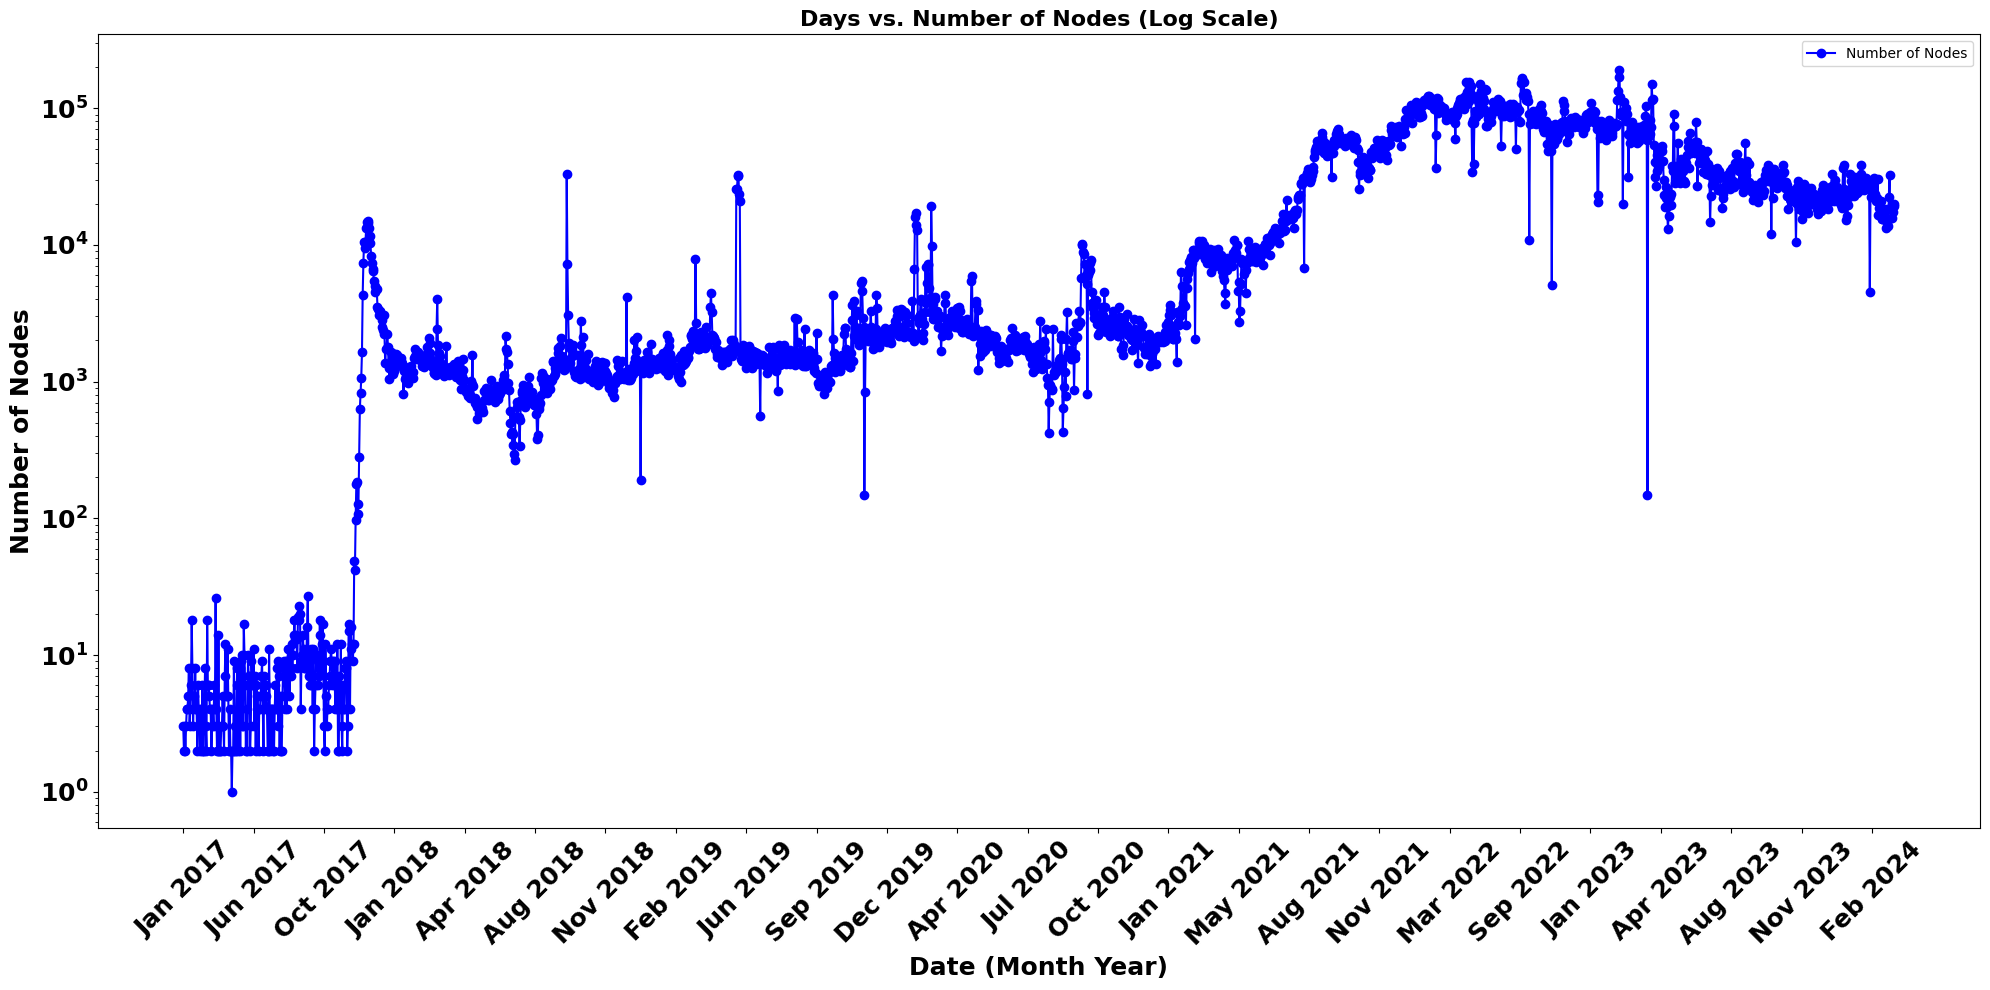

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file from the updated file path
file_path = r'D:\Desktop\SEM 7\MINI_2_2017\new_csv_data_2017\node_results.csv'
df = pd.read_csv(file_path)

# Convert 'Day' column to datetime format for proper handling
df['Day'] = pd.to_datetime(df['Day'])

# Sort data by the 'Day' column
df.sort_values(by='Day', inplace=True)

# Create a new index based on the number of days since the first date for plotting
days_index = np.arange(len(df))  # Index based on the length of the data

# Plotting the line graph (Days vs Number of Nodes)
plt.figure(figsize=(20, 10))  # Set figure size
plt.plot(days_index, df['Number_of_Nodes'].values, marker='o', linestyle='-', color='b', label='Number of Nodes')

# Set x-axis labels every 20 days for a clearer view
step_size = 100  # Increase step size to reduce clutter on x-axis
selected_indices = list(range(0, len(df), step_size))  # Select indices spaced by step_size

# Set x-axis ticks and labels with month and year in bold
plt.xticks(
    ticks=selected_indices,
    labels=df['Day'].dt.strftime('%b %Y').iloc[selected_indices],  # Format the date as 'Mon Year'
    rotation=45,  # Rotating by 45 degrees to avoid overlap
    fontsize=18,
    fontweight='bold'  # Set the font to bold
)

# Set y-axis to log scale
plt.yscale('log')

# Customize y-axis ticks
plt.yticks(fontweight='bold',fontsize=18)

# Set labels and title
plt.xlabel('Date (Month Year)', fontsize=18, fontweight='bold')
plt.ylabel('Number of Nodes', fontsize=18, fontweight='bold')
plt.title('Days vs. Number of Nodes (Log Scale)', fontsize=16, fontweight='bold')

# Disable grid
plt.grid(False)

# Add a legend
plt.legend()

# Adjust the layout to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()


### Nodes_log_Scale 

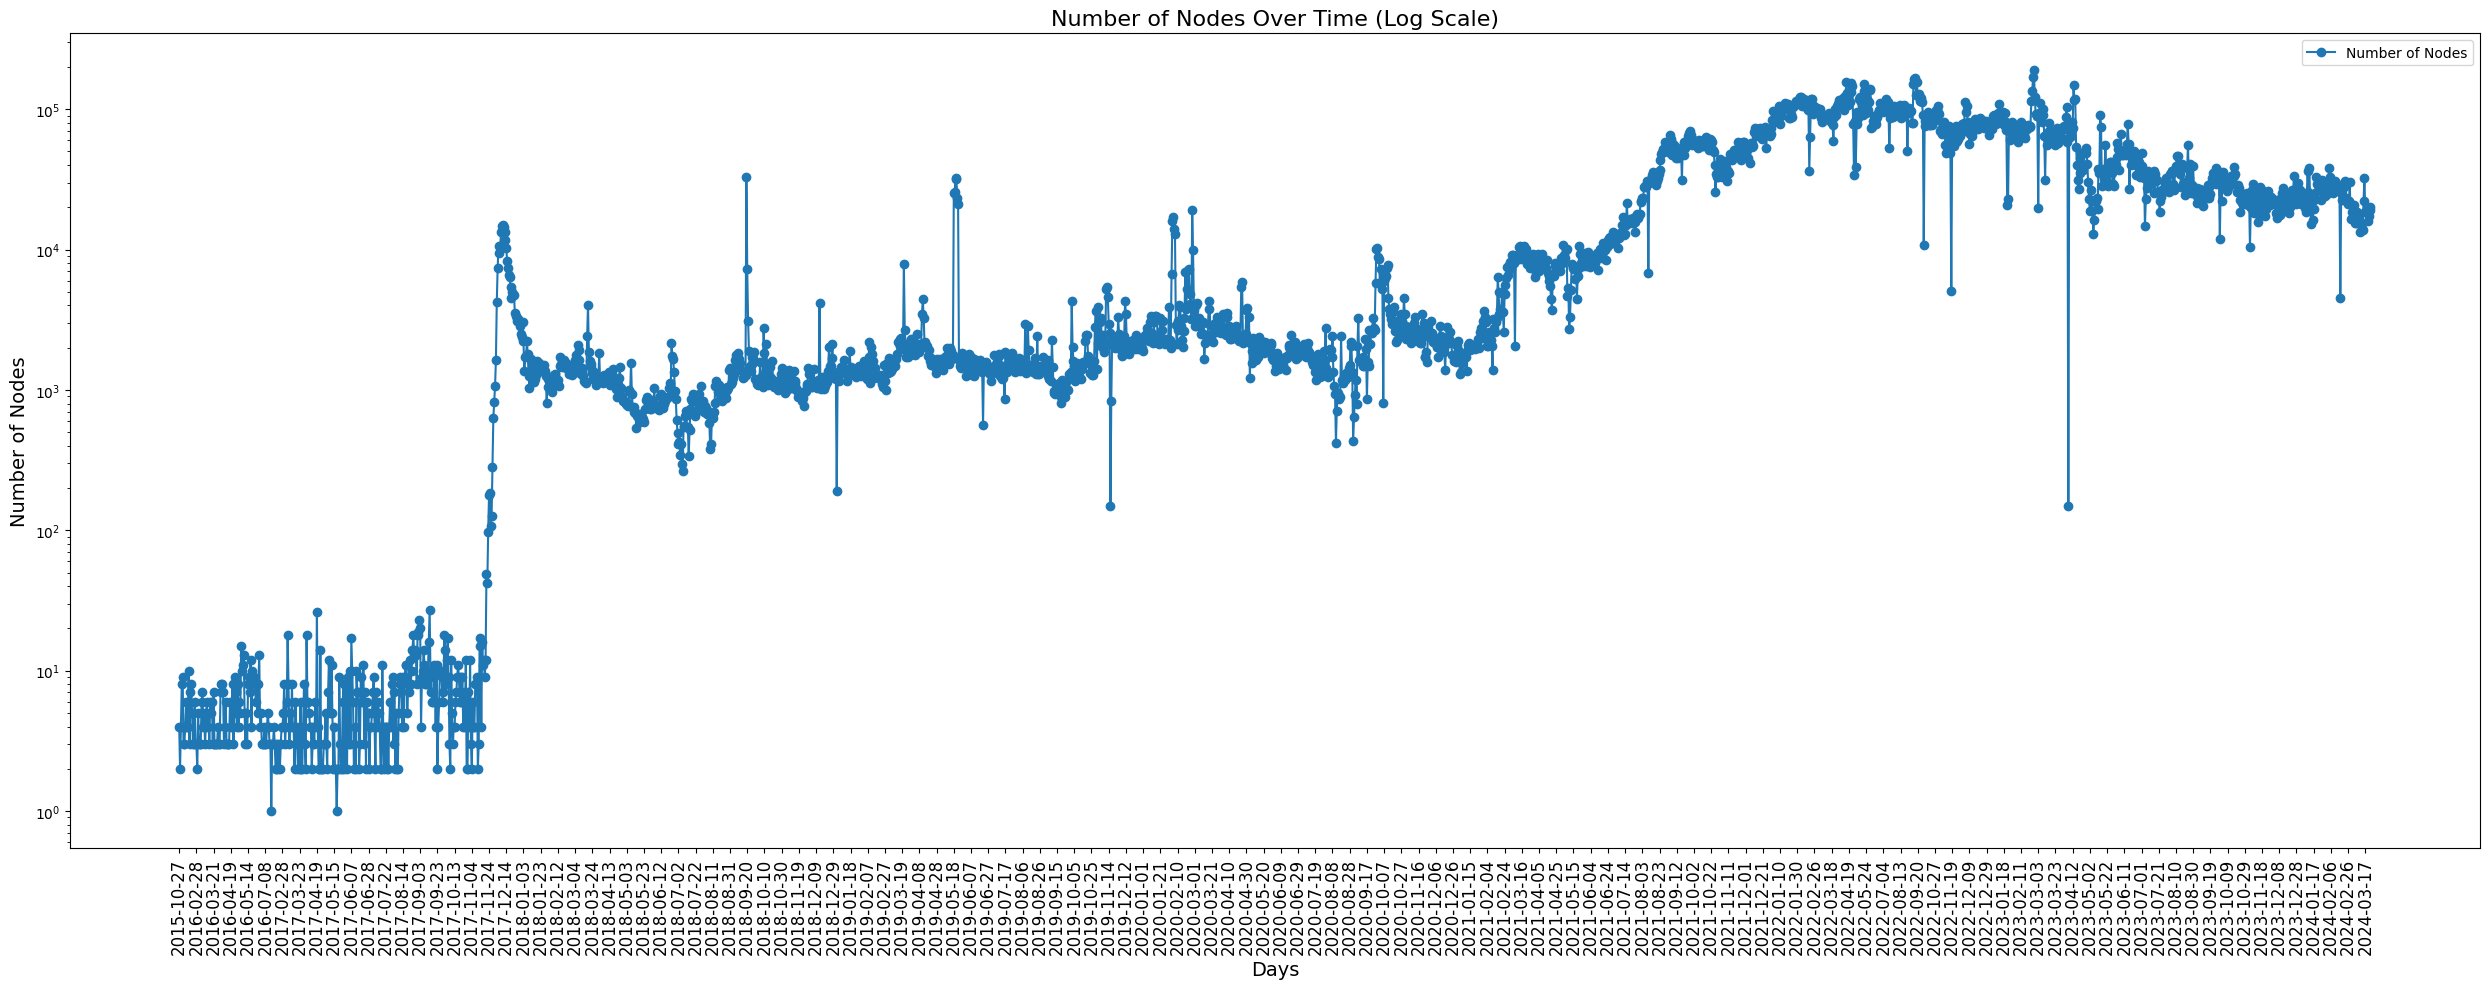

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to your CSV file
csv_file_path = r'/home/prio/loc_project/Mini_2_ERC_721/num_nodes_per_day.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Convert the 'Day' column to a datetime format
df['Day'] = pd.to_datetime(df['Day'], format='%Y-%m-%d')  # Correct format for ISO dates

# Extract the 'Day' and 'Number of Nodes' columns
days = df['Day']
num_nodes = df['Number of Nodes']

# Plot the data with improved readability
plt.figure(figsize=(25, 10))  # Increase the figure size for better readability
plt.plot(range(len(days)), num_nodes, marker='o', linestyle='-', color='#1f77b4', label='Number of Nodes')

plt.xlabel('Days', fontsize=14)
plt.ylabel('Number of Nodes', fontsize=14)
plt.title('Number of Nodes Over Time (Log Scale)', fontsize=16)

# Set the y-axis to a logarithmic scale
plt.yscale('log')

# Selectively label x-axis ticks
selected_indices = list(range(0, len(days), 20))  # Label every 20th day

plt.xticks(
    ticks=selected_indices,  # Set the selected indices
    labels=[days[idx].strftime('%Y-%m-%d') for idx in selected_indices],  # Format the date labels
    fontsize=12,  # Font size for x-tick labels
    rotation=90  # Rotate labels for better readability
)

# Remove grid lines
plt.grid(False)

plt.tight_layout()  # Adjust layout to fit labels

# Add a legend
plt.legend()

# Display the plot
plt.show()


Total Number of Unique Nodes: 7911028


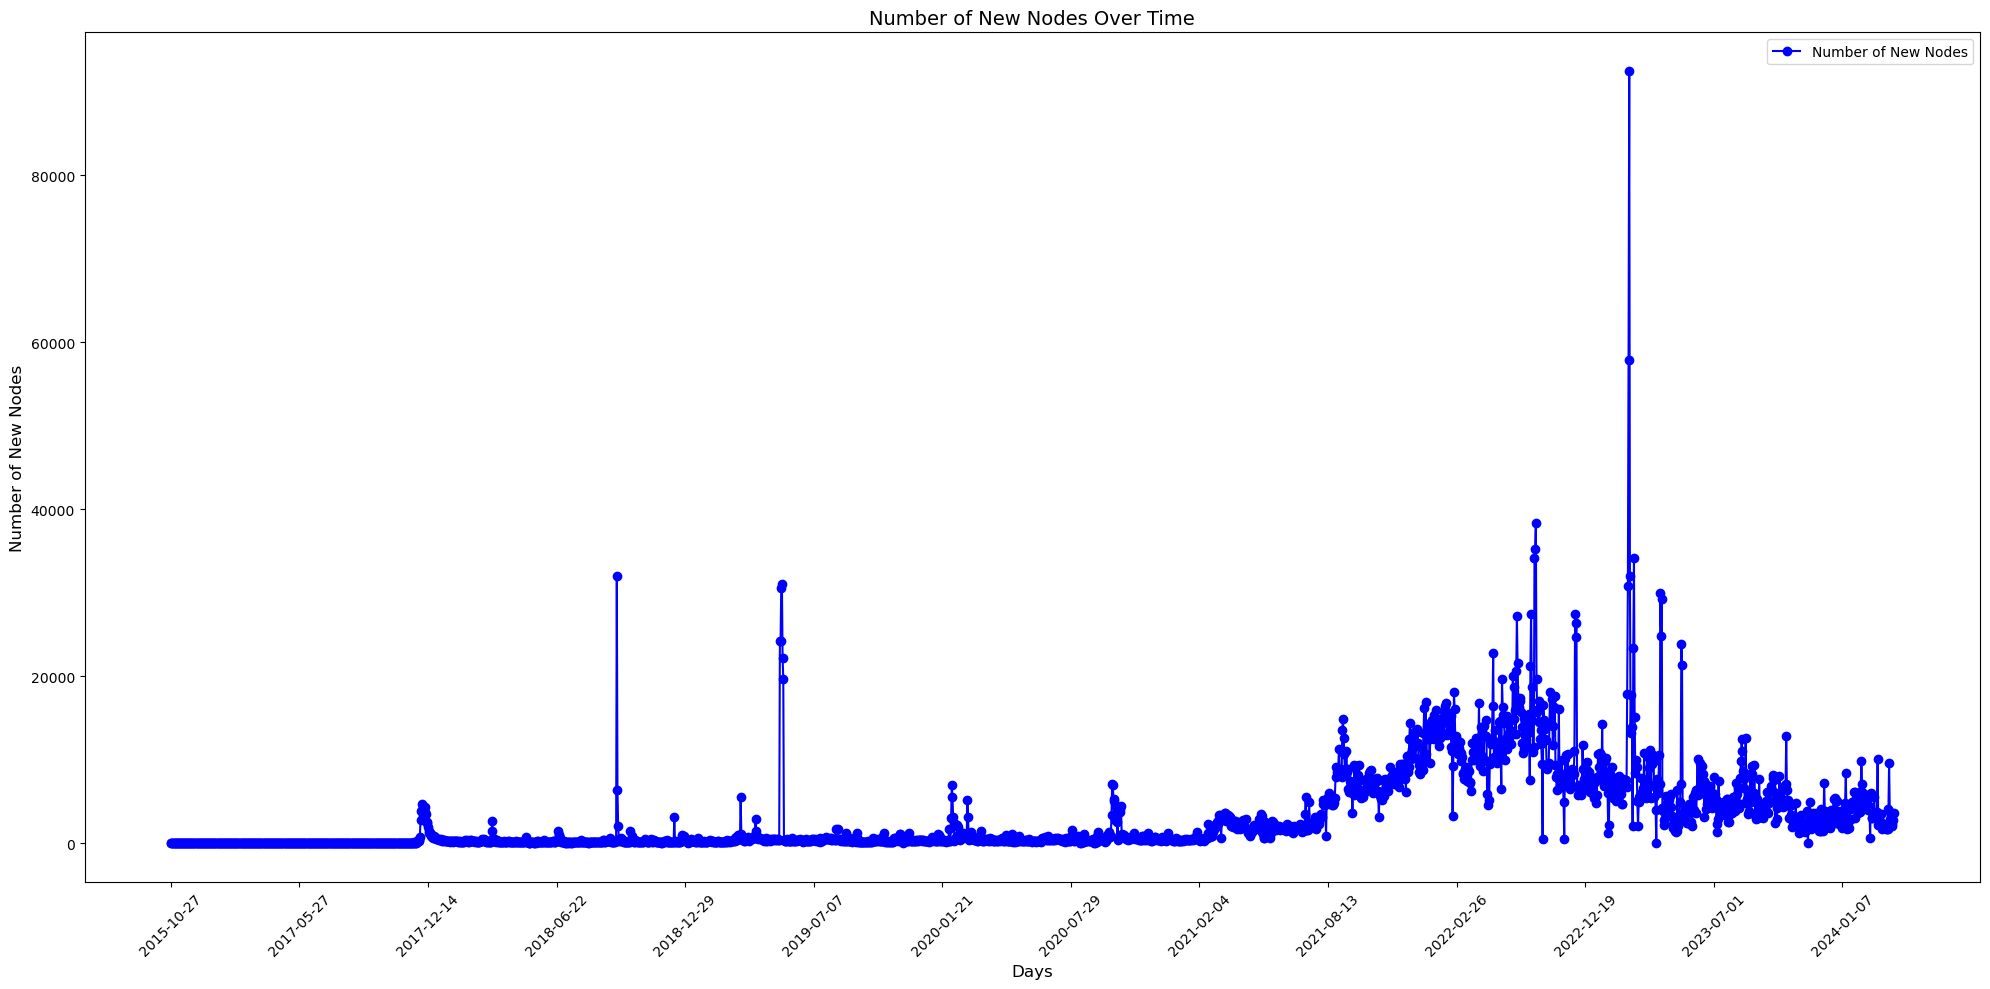

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
file_path = '/home/prio/loc_project/Mini_2_ERC_721/csv_data/new_nodes.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Calculate the total number of unique nodes (total new nodes)
total_unique_nodes = df['Number of New Nodes'].sum()
print(f"Total Number of Unique Nodes: {total_unique_nodes}")

# Convert the 'Day' column to datetime format for proper handling
df['Day'] = pd.to_datetime(df['Day'])

# Sort data by the 'Day' column
df.sort_values(by='Day', inplace=True)

# Create a new index based on the number of days since the first date for plotting
days_index = np.arange(len(df))  # Index based on the length of the data

# Plotting the line graph
plt.figure(figsize=(20, 10))  # Set figure size
plt.plot(days_index, df['Number of New Nodes'].values, marker='o', linestyle='-', color='b', label='Number of New Nodes')

# Set x-axis labels every 200 days
step_size = 190  # Set the step size for x-axis labels
selected_indices = list(range(0, len(df), step_size))  # Select indices spaced by step_size

# Set x-axis ticks and labels
plt.xticks(
    ticks=selected_indices,
    labels=df['Day'].dt.strftime('%Y-%m-%d').iloc[selected_indices],  # Format the date labels
    rotation=45,
    fontsize=10
)

# Set labels and title
plt.xlabel('Days', fontsize=12)
plt.ylabel('Number of New Nodes', fontsize=12)
plt.title('Number of New Nodes Over Time', fontsize=14)

# plt.yscale('log')

# Disable grid
plt.grid(False)

# Add a legend
plt.legend()

# Adjust the layout to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()


Total Number of Unique Nodes: 7911028


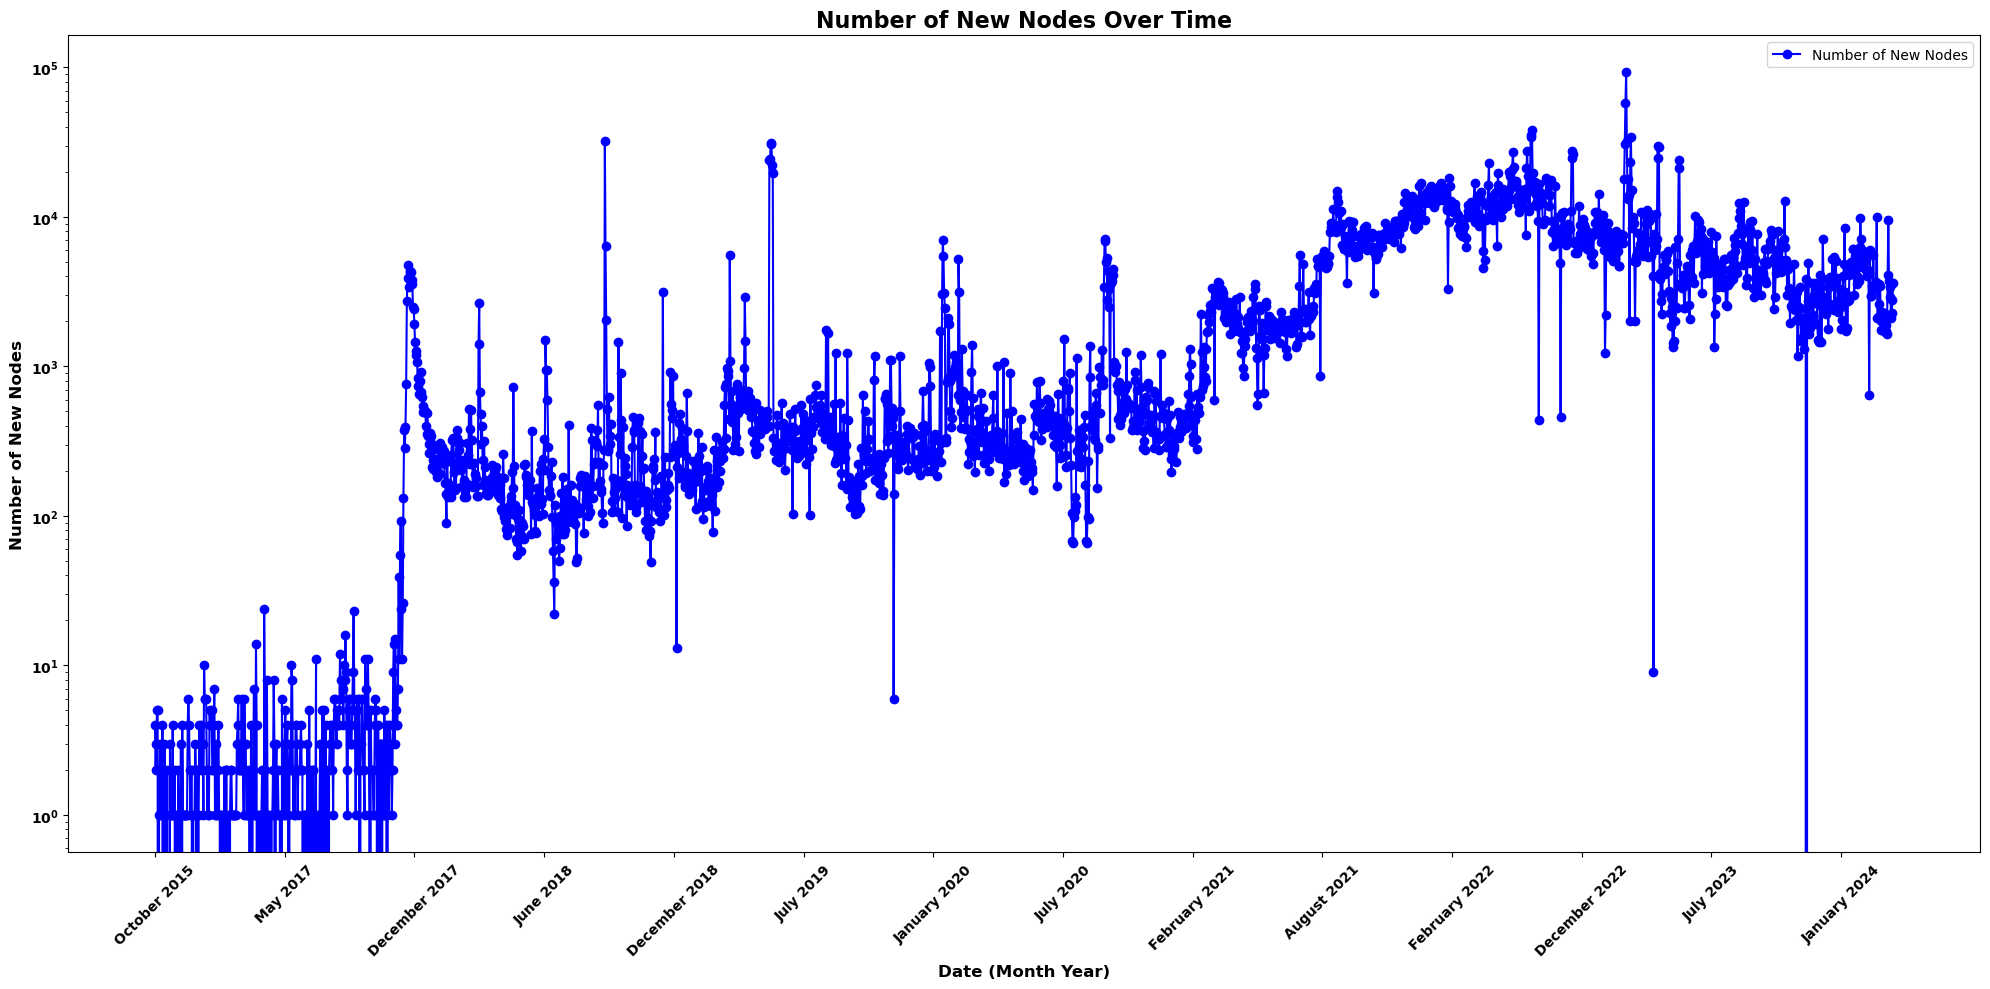

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
file_path = '/home/prio/loc_project/Mini_2_ERC_721/csv_data/new_nodes.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Calculate the total number of unique nodes (total new nodes)
total_unique_nodes = df['Number of New Nodes'].sum()
print(f"Total Number of Unique Nodes: {total_unique_nodes}")

# Convert the 'Day' column to datetime format for proper handling
df['Day'] = pd.to_datetime(df['Day'])

# Sort data by the 'Day' column
df.sort_values(by='Day', inplace=True)

# Create a new index based on the number of days since the first date for plotting
days_index = np.arange(len(df))  # Index based on the length of the data

# Plotting the line graph
plt.figure(figsize=(20, 10))  # Set figure size
plt.plot(days_index, df['Number of New Nodes'].values, marker='o', linestyle='-', color='b', label='Number of New Nodes')

# Set x-axis labels every 190 days
step_size = 190  # Set the step size for x-axis labels
selected_indices = list(range(0, len(df), step_size))  # Select indices spaced by step_size

# Set x-axis ticks and labels with month and year in bold
plt.xticks(
    ticks=selected_indices,
    labels=df['Day'].dt.strftime('%B %Y').iloc[selected_indices],  # Format the date as 'Month Year'
    rotation=45,
    fontsize=10,
    fontweight='bold'  # Set the font to bold
)

plt.yticks(
    fontweight='bold'
)

# Set labels and title
plt.xlabel('Date (Month Year)', fontsize=12, fontweight='bold')
plt.ylabel('Number of New Nodes', fontsize=12, fontweight='bold')
plt.title('Number of New Nodes Over Time', fontsize=16, fontweight='bold')

# Set y-axis scale to logarithmic
plt.yscale('log')

# Disable grid
plt.grid(False)

# Add a legend
plt.legend()

# Adjust the layout to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()


# No.of new Nodes added over time

New nodes added every day:
2015-10-27: 4
Progress: 0.04% (1/2547)
2016-02-01: 2
Progress: 0.08% (2/2547)
2016-02-04: 3
Progress: 0.12% (3/2547)
2016-02-09: 5
Progress: 0.16% (4/2547)
2016-02-11: 5
Progress: 0.20% (5/2547)
2016-02-12: 0
Progress: 0.24% (6/2547)
2016-02-13: 1
Progress: 0.27% (7/2547)
2016-02-14: 2
Progress: 0.31% (8/2547)
2016-02-15: 3
Progress: 0.35% (9/2547)
2016-02-16: 1
Progress: 0.39% (10/2547)
2016-02-17: 1
Progress: 0.43% (11/2547)
2016-02-18: 4
Progress: 0.47% (12/2547)
2016-02-19: 0
Progress: 0.51% (13/2547)
2016-02-20: 1
Progress: 0.55% (14/2547)
2016-02-21: 3
Progress: 0.59% (15/2547)
2016-02-22: 1
Progress: 0.63% (16/2547)
2016-02-23: 1
Progress: 0.67% (17/2547)
2016-02-25: 0
Progress: 0.71% (18/2547)
2016-02-26: 2
Progress: 0.75% (19/2547)
2016-02-27: 0
Progress: 0.79% (20/2547)
2016-02-28: 0
Progress: 0.82% (21/2547)
2016-02-29: 0
Progress: 0.86% (22/2547)
2016-03-01: 3
Progress: 0.90% (23/2547)
2016-03-02: 1
Progress: 0.94% (24/2547)
2016-03-03: 1
Progress

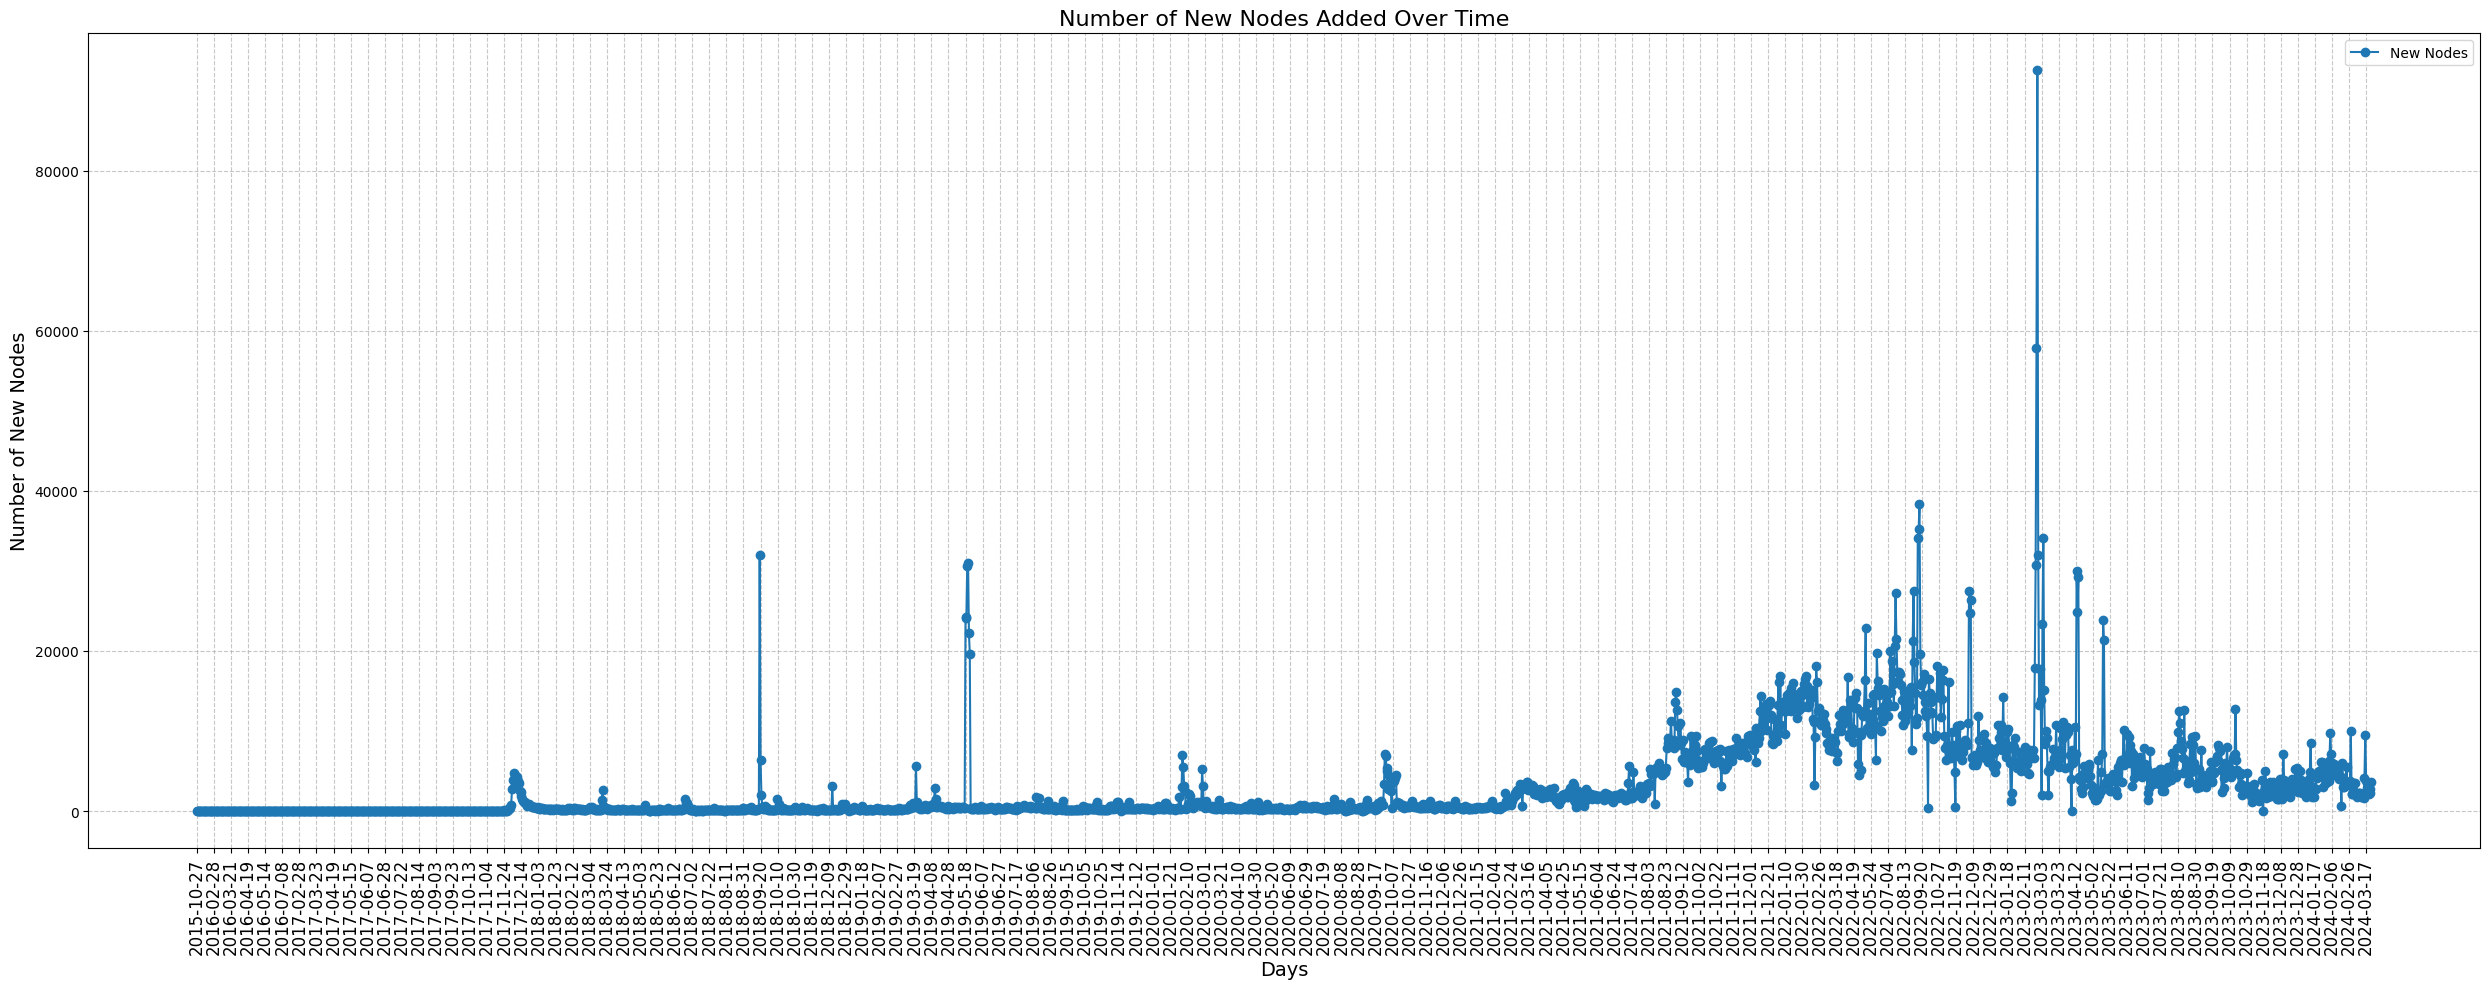

In [7]:
import os
import pandas as pd
import hypernetx as hnx
import matplotlib.pyplot as plt

# Define the input directory for labeled files
labeled_dir = r'/home/prio/loc_project/Mini_2_ERC_721/labelling_out'

# Define the output file to save the calculated data
output_file = r'/home/prio/loc_project/Mini_2_ERC_721/new_nodes.csv'

# Initialize a list to store the number of new nodes for each day
new_nodes_per_day = []

# Initialize a set to keep track of all nodes encountered so far
cumulative_nodes = set()

# Get the total number of files to process
total_files = len([f for f in os.listdir(labeled_dir) if f.endswith('.csv')])

print("New nodes added every day:")

# Process each CSV file in the labeled directory
for i, filename in enumerate(sorted(os.listdir(labeled_dir))):
    if filename.endswith('.csv'):
        file_path = os.path.join(labeled_dir, filename)
        
        df = pd.read_csv(file_path)
        
        # Initialize a set to store nodes for the current day
        current_day_nodes = set(df['fromLabel']).union(set(df['toLabel']))
        
        # Calculate new nodes by finding the difference between current day's nodes and cumulative nodes
        new_nodes = current_day_nodes - cumulative_nodes
        
        # Add the new nodes to the cumulative set
        cumulative_nodes.update(current_day_nodes)
        
        # Count the number of new nodes
        num_new_nodes = len(new_nodes)
        edge_name = filename.replace('.csv', '')
        new_nodes_per_day.append((edge_name, num_new_nodes))
        
        # Print the number of new nodes for the current day
        print(f"{edge_name}: {num_new_nodes}")
        
        # Print progress
        progress = (i + 1) / total_files * 100
        print(f"Progress: {progress:.2f}% ({i + 1}/{total_files})")

# Save the calculated data to a CSV file
df_output = pd.DataFrame(new_nodes_per_day, columns=['Day', 'Number of New Nodes'])
df_output.to_csv(output_file, index=False)

# Sort the new nodes count by edge name (which corresponds to the day)
new_nodes_per_day.sort()

# Extract the days and corresponding number of new nodes
days = [day for day, _ in new_nodes_per_day]
num_new_nodes = [nodes for _, nodes in new_nodes_per_day]

plt.figure(figsize=(25, 10))  # Increase the figure size for better readability
plt.plot(range(len(days)), num_new_nodes, marker='o', linestyle='-', color='#1f77b4', label='New Nodes')  # Use a different color

plt.xlabel('Days', fontsize=14)
plt.ylabel('Number of New Nodes', fontsize=14)
plt.title('Number of New Nodes Added Over Time', fontsize=16)

# Selectively label x-axis ticks
selected_indices = list(range(0, len(days), 20))  # Label every 20th day

plt.xticks(
    ticks=selected_indices,  # Set the selected indices
    labels=[days[idx] for idx in selected_indices],  # Set corresponding day names as labels
    fontsize=12,  # Font size for x-tick labels
    rotation=90  # Rotate labels for better readability
)

# Annotate points (days, num_new_nodes)
# for i, (day, nodes) in enumerate(new_nodes_per_day):
#     if i % 30 == 0:  # Annotate every 10th point for clarity
#         plt.text(i, nodes, f'({day}, {nodes})', fontsize=10, ha='center', va='bottom', rotation=45, color='green')

plt.tight_layout()  # Adjust layout to fit labels

# Optional: Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Add a legend
plt.legend()

# Display the plot
plt.show()



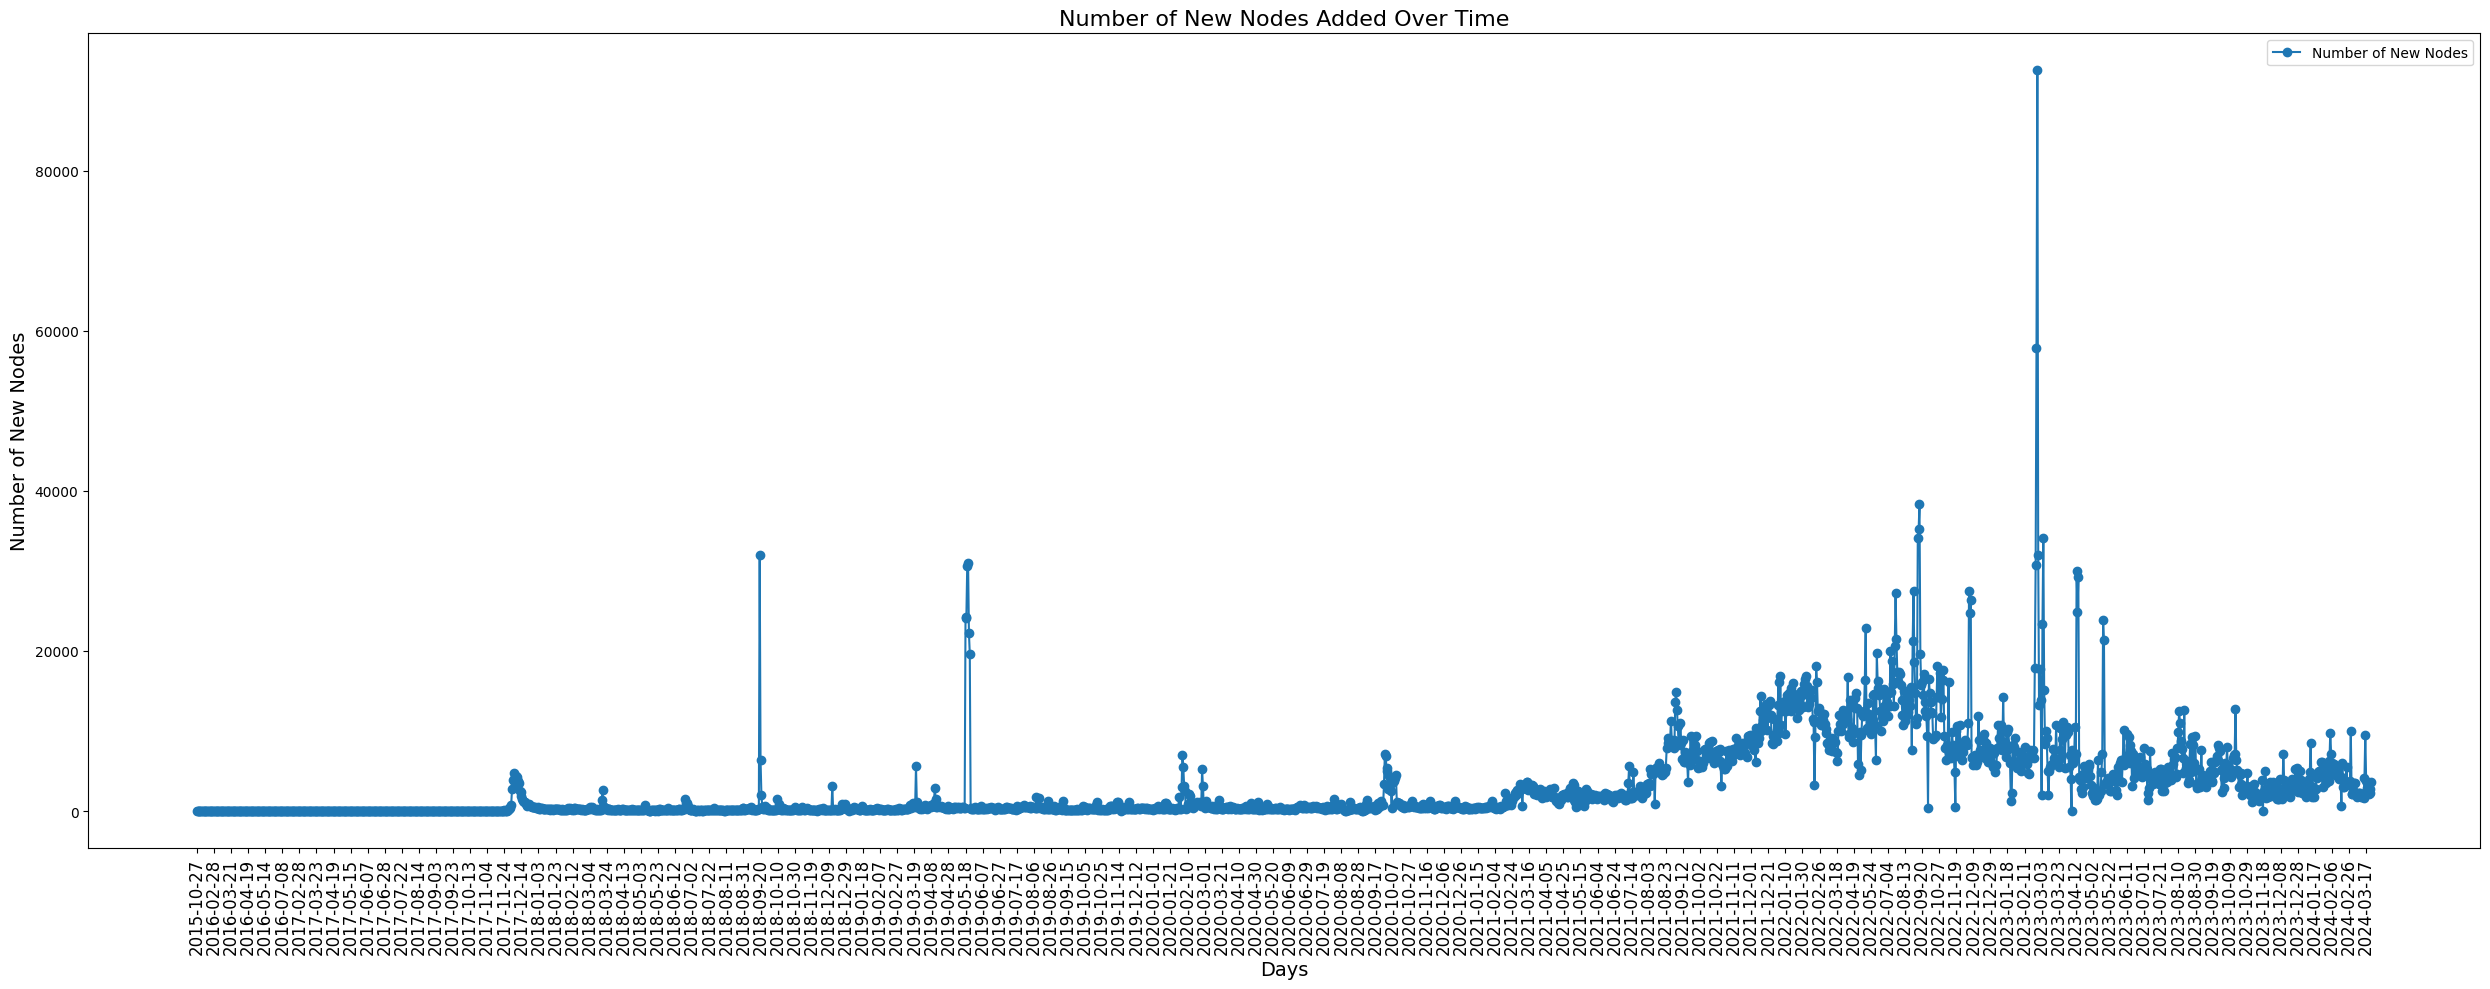

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to your CSV file
csv_file_path = r'/home/prio/loc_project/Mini_2_ERC_721/new_nodes.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Convert the 'Day' column to a datetime format
df['Day'] = pd.to_datetime(df['Day'], format='%Y-%m-%d')  # Correct format for ISO dates

# Extract the 'Day' and 'Number of New Nodes' columns
days = df['Day']
num_new_nodes = df['Number of New Nodes']  # Assuming this column exists in your CSV

# Plot the data with improved readability
plt.figure(figsize=(25, 10))  # Increase the figure size for better readability
plt.plot(range(len(days)), num_new_nodes, marker='o', linestyle='-', color='#1f77b4', label='Number of New Nodes')

plt.xlabel('Days', fontsize=14)
plt.ylabel('Number of New Nodes', fontsize=14)
plt.title('Number of New Nodes Added Over Time', fontsize=16)

# Selectively label x-axis ticks
selected_indices = list(range(0, len(days), 20))  # Label every 20th day

plt.xticks(
    ticks=selected_indices,  # Set the selected indices
    labels=[days[idx].strftime('%Y-%m-%d') for idx in selected_indices],  # Format the date labels
    fontsize=12,  # Font size for x-tick labels
    rotation=90  # Rotate labels for better readability
)

# Remove grid lines
plt.grid(False)

plt.tight_layout()  # Adjust layout to fit labels

# Add a legend
plt.legend()

# Display the plot
plt.show()


### New_nodes_Log

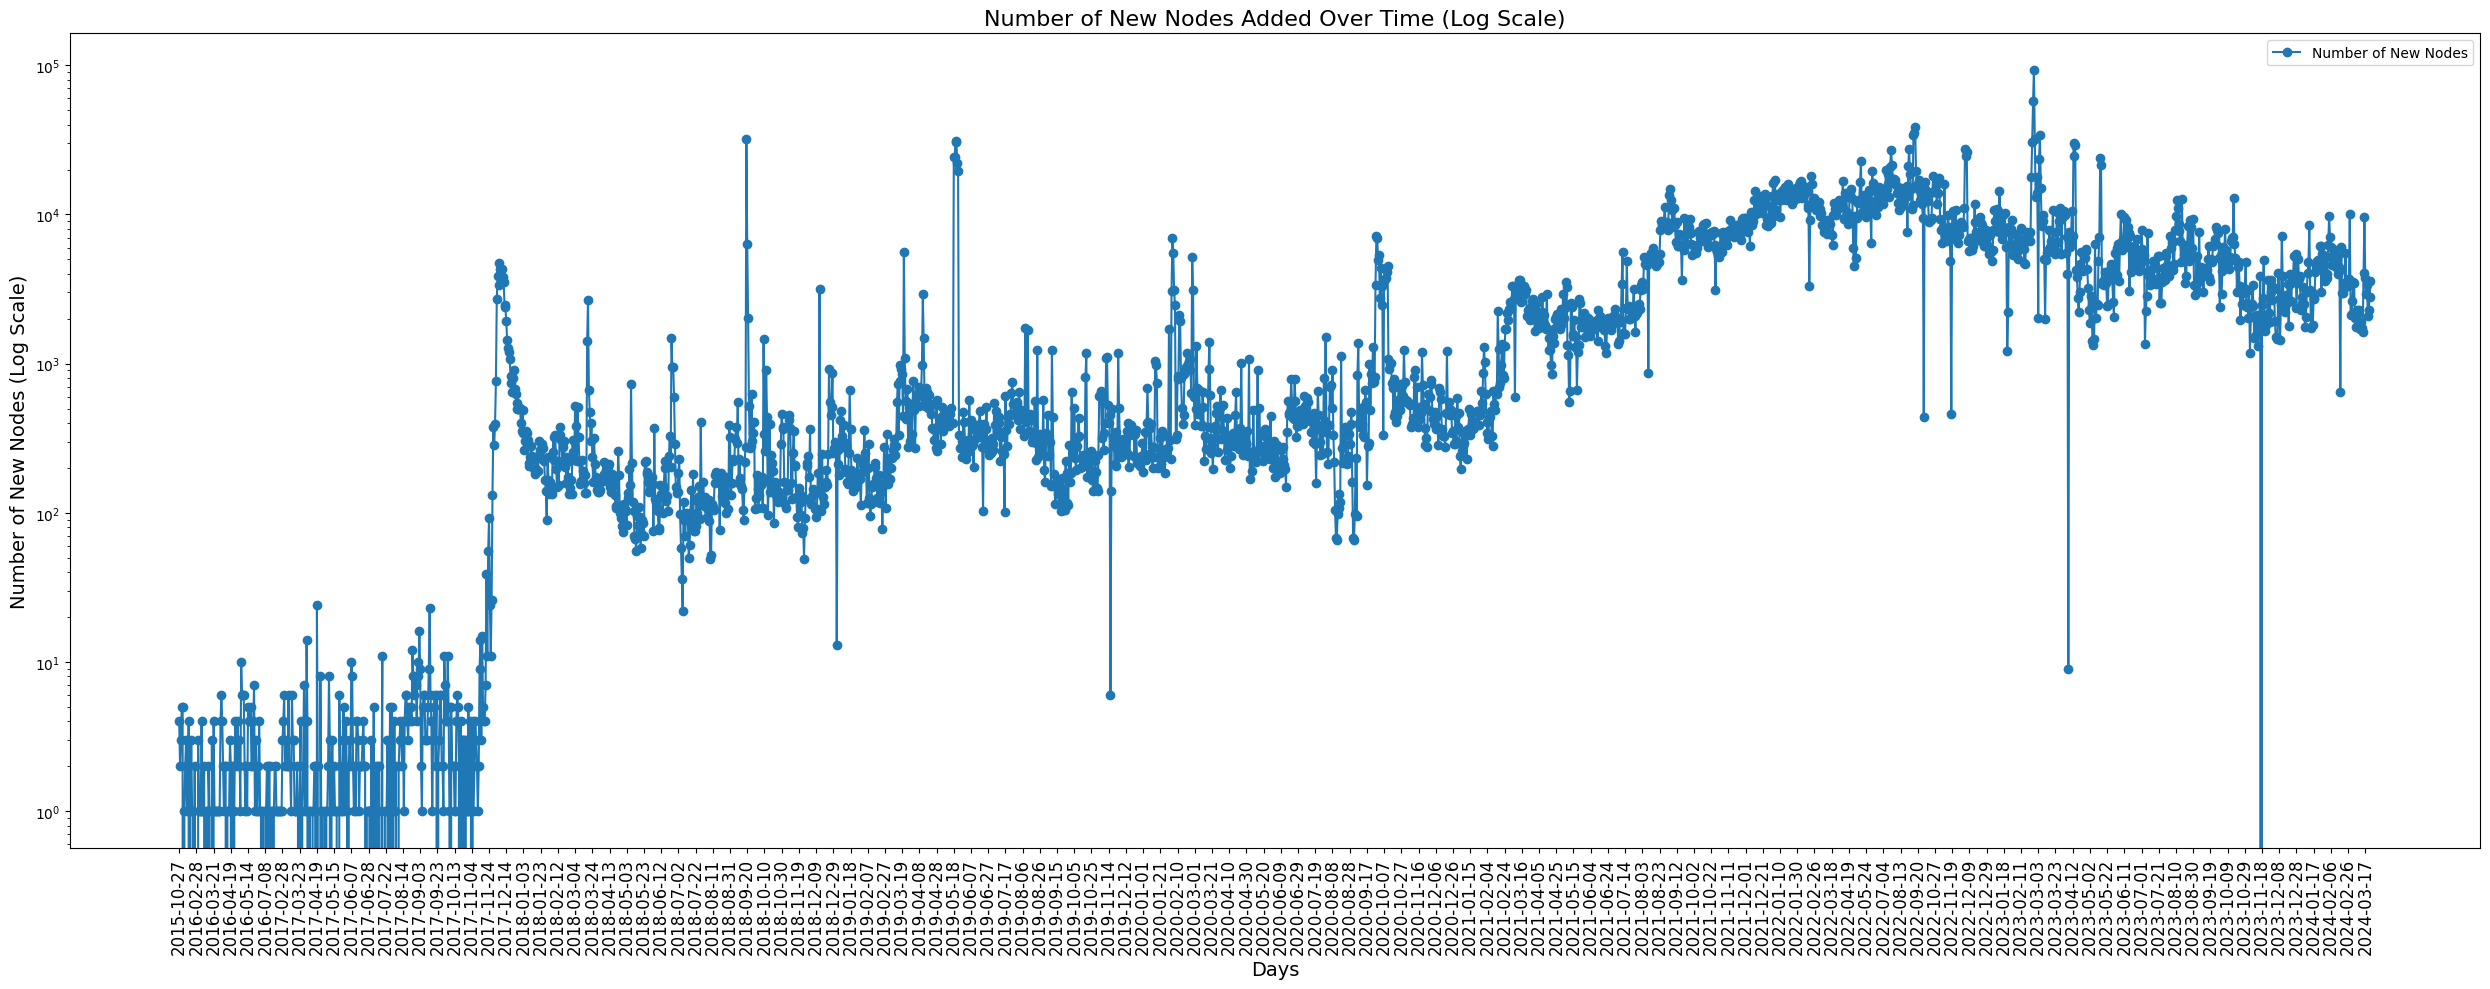

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to your CSV file
csv_file_path = r'/home/prio/loc_project/Mini_2_ERC_721/new_nodes.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Convert the 'Day' column to a datetime format
df['Day'] = pd.to_datetime(df['Day'], format='%Y-%m-%d')  # Correct format for ISO dates

# Extract the 'Day' and 'Number of New Nodes' columns
days = df['Day']
num_new_nodes = df['Number of New Nodes']  # Assuming this column exists in your CSV

# Plot the data with improved readability
plt.figure(figsize=(25, 10))  # Increase the figure size for better readability
plt.plot(range(len(days)), num_new_nodes, marker='o', linestyle='-', color='#1f77b4', label='Number of New Nodes')

plt.xlabel('Days', fontsize=14)
plt.ylabel('Number of New Nodes (Log Scale)', fontsize=14)
plt.title('Number of New Nodes Added Over Time (Log Scale)', fontsize=16)

# Apply logarithmic scale to the y-axis
plt.yscale('log')

# Selectively label x-axis ticks
selected_indices = list(range(0, len(days), 20))  # Label every 20th day

plt.xticks(
    ticks=selected_indices,  # Set the selected indices
    labels=[days[idx].strftime('%Y-%m-%d') for idx in selected_indices],  # Format the date labels
    fontsize=12,  # Font size for x-tick labels
    rotation=90  # Rotate labels for better readability
)

# Remove grid lines
plt.grid(False)

plt.tight_layout()  # Adjust layout to fit labels

# Add a legend
plt.legend()

# Display the plot
plt.show()


# Node_Results 

Processed 1/2547 files: 2015-10-27 with 4 nodes, 4 new nodes
Processed 2/2547 files: 2016-02-01 with 2 nodes, 2 new nodes
Processed 3/2547 files: 2016-02-04 with 4 nodes, 3 new nodes
Processed 4/2547 files: 2016-02-09 with 8 nodes, 5 new nodes
Processed 5/2547 files: 2016-02-11 with 9 nodes, 5 new nodes
Processed 6/2547 files: 2016-02-12 with 3 nodes, 0 new nodes
Processed 7/2547 files: 2016-02-13 with 3 nodes, 1 new nodes
Processed 8/2547 files: 2016-02-14 with 4 nodes, 2 new nodes
Processed 9/2547 files: 2016-02-15 with 6 nodes, 3 new nodes
Processed 10/2547 files: 2016-02-16 with 4 nodes, 1 new nodes
Processed 11/2547 files: 2016-02-17 with 4 nodes, 1 new nodes
Processed 12/2547 files: 2016-02-18 with 10 nodes, 4 new nodes
Processed 13/2547 files: 2016-02-19 with 3 nodes, 0 new nodes
Processed 14/2547 files: 2016-02-20 with 7 nodes, 1 new nodes
Processed 15/2547 files: 2016-02-21 with 8 nodes, 3 new nodes
Processed 16/2547 files: 2016-02-22 with 5 nodes, 1 new nodes
Processed 17/254

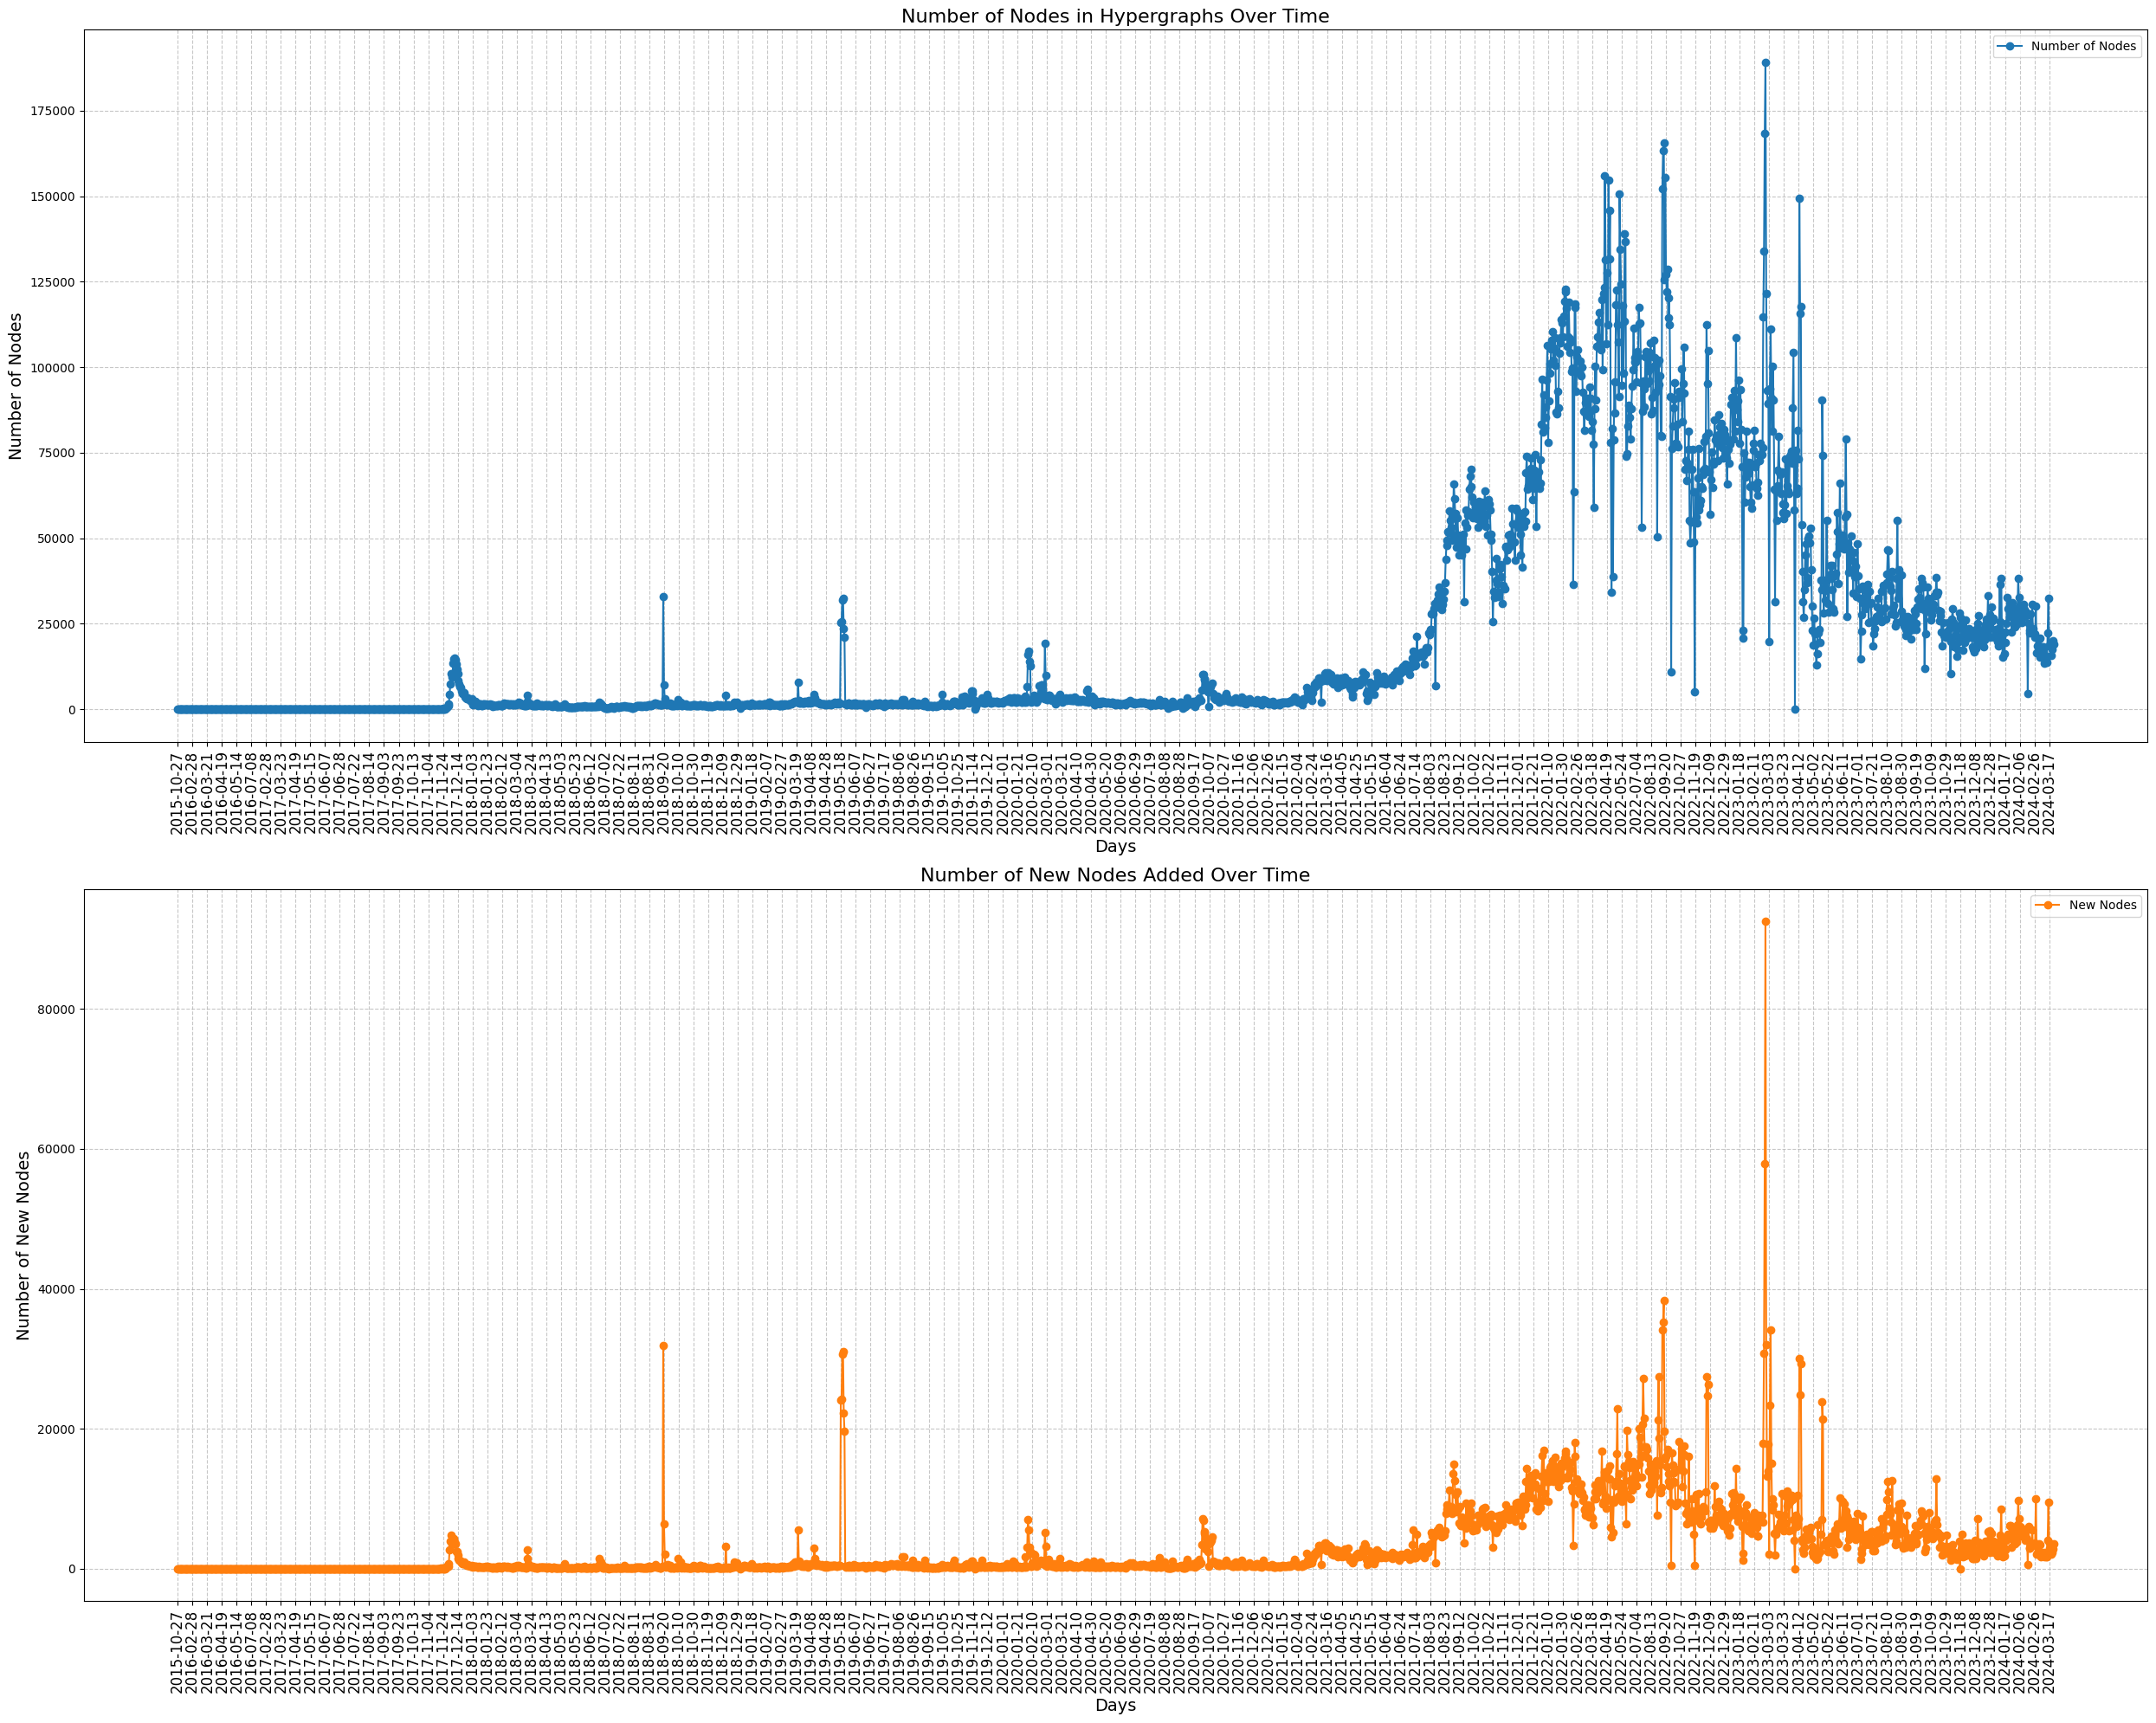

In [14]:
import os
import pandas as pd
import hypernetx as hnx
import matplotlib.pyplot as plt

# Define the input directory for labeled files and output file for storing data
labeled_dir = r'/home/prio/loc_project/Mini_2_ERC_721/labelling_out'
output_file = r'/home/prio/loc_project/Mini_2_ERC_721/node_results.csv'  # CSV file to save the calculated data

# Initialize lists to store the number of nodes and the number of new nodes for each day
num_nodes_per_day = []
new_nodes_per_day = []

# Initialize a set to keep track of all nodes encountered so far
cumulative_nodes = set()

# Process each CSV file in the labeled directory
total_files = len([f for f in os.listdir(labeled_dir) if f.endswith('.csv')])
for idx, filename in enumerate(sorted(os.listdir(labeled_dir))):
    if filename.endswith('.csv'):
        file_path = os.path.join(labeled_dir, filename)
        
        df = pd.read_csv(file_path)
        
        # Initialize a dictionary to store the hyperedges for the current day
        hyperedges = {}
        
        # Group by 'tokenAddressLabel' to create hyperedges
        for token, group in df.groupby('tokenAddressLabel'):
            hyperedges[token] = set(group['fromLabel']).union(set(group['toLabel']))
        
        # Create the hypergraph for the current day
        H = hnx.Hypergraph(hyperedges)
        
        # Get the number of nodes in the current hypergraph
        num_nodes = len(H.nodes)
        edge_name = filename.replace('.csv', '')
        num_nodes_per_day.append((edge_name, num_nodes))
        
        # Initialize a set to store nodes for the current day
        current_day_nodes = set(df['fromLabel']).union(set(df['toLabel']))
        
        # Calculate new nodes by finding the difference between current day's nodes and cumulative nodes
        new_nodes = current_day_nodes - cumulative_nodes
        
        # Add the new nodes to the cumulative set
        cumulative_nodes.update(current_day_nodes)
        
        # Count the number of new nodes
        num_new_nodes = len(new_nodes)
        new_nodes_per_day.append((edge_name, num_new_nodes))
        
        # Print progress
        print(f"Processed {idx + 1}/{total_files} files: {edge_name} with {num_nodes} nodes, {num_new_nodes} new nodes")

# Save the calculated data to a CSV file
df_results = pd.DataFrame({
    'Day': [day for day, _ in num_nodes_per_day],
    'Number_of_Nodes': [nodes for _, nodes in num_nodes_per_day],
    'New_Nodes': [nodes for _, nodes in new_nodes_per_day]
})
df_results.to_csv(output_file, index=False)

# Load the data for plotting (useful for later without recalculating)
df_loaded = pd.read_csv(output_file)
days = df_loaded['Day']
num_nodes = df_loaded['Number_of_Nodes']
num_new_nodes = df_loaded['New_Nodes']

# Plot the number of nodes and new nodes over time in subplots
plt.figure(figsize=(25, 20))  # Increase the figure size for better readability

# Plot the number of nodes
plt.subplot(2, 1, 1)
plt.plot(range(len(days)), num_nodes, marker='o', linestyle='-', color='#1f77b4', label='Number of Nodes')
plt.xlabel('Days', fontsize=14)
plt.ylabel('Number of Nodes', fontsize=14)
plt.title('Number of Nodes in Hypergraphs Over Time', fontsize=16)

# Selectively label x-axis ticks
selected_indices = list(range(0, len(days), 20))  # Label every 20th day
plt.xticks(
    ticks=selected_indices,
    labels=[days[idx] for idx in selected_indices],
    fontsize=12,
    rotation=90
)

# Annotate points (days, num_nodes)
# for i, (day, nodes) in enumerate(zip(days, num_nodes)):
#     if i % 30 == 0:  # Annotate every 30th point for clarity
#         plt.text(i, nodes, f'({day}, {nodes})', fontsize=10, ha='center', va='bottom', rotation=45, color='red')

plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Plot the number of new nodes
plt.subplot(2, 1, 2)
plt.plot(range(len(days)), num_new_nodes, marker='o', linestyle='-', color='#ff7f0e', label='New Nodes')
plt.xlabel('Days', fontsize=14)
plt.ylabel('Number of New Nodes', fontsize=14)
plt.title('Number of New Nodes Added Over Time', fontsize=16)

# Selectively label x-axis ticks
plt.xticks(
    ticks=selected_indices,
    labels=[days[idx] for idx in selected_indices],
    fontsize=12,
    rotation=90
)

plt.grid(False)
# Annotate points (days, num_new_nodes)
# for i, (day, nodes) in enumerate(zip(days, num_new_nodes)):
#     if i % 30 == 0:  # Annotate every 30th point for clarity
#         plt.text(i, nodes, f'({day}, {nodes})', fontsize=10, ha='center', va='bottom', rotation=45, color='green')

plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Display the plots
plt.show()


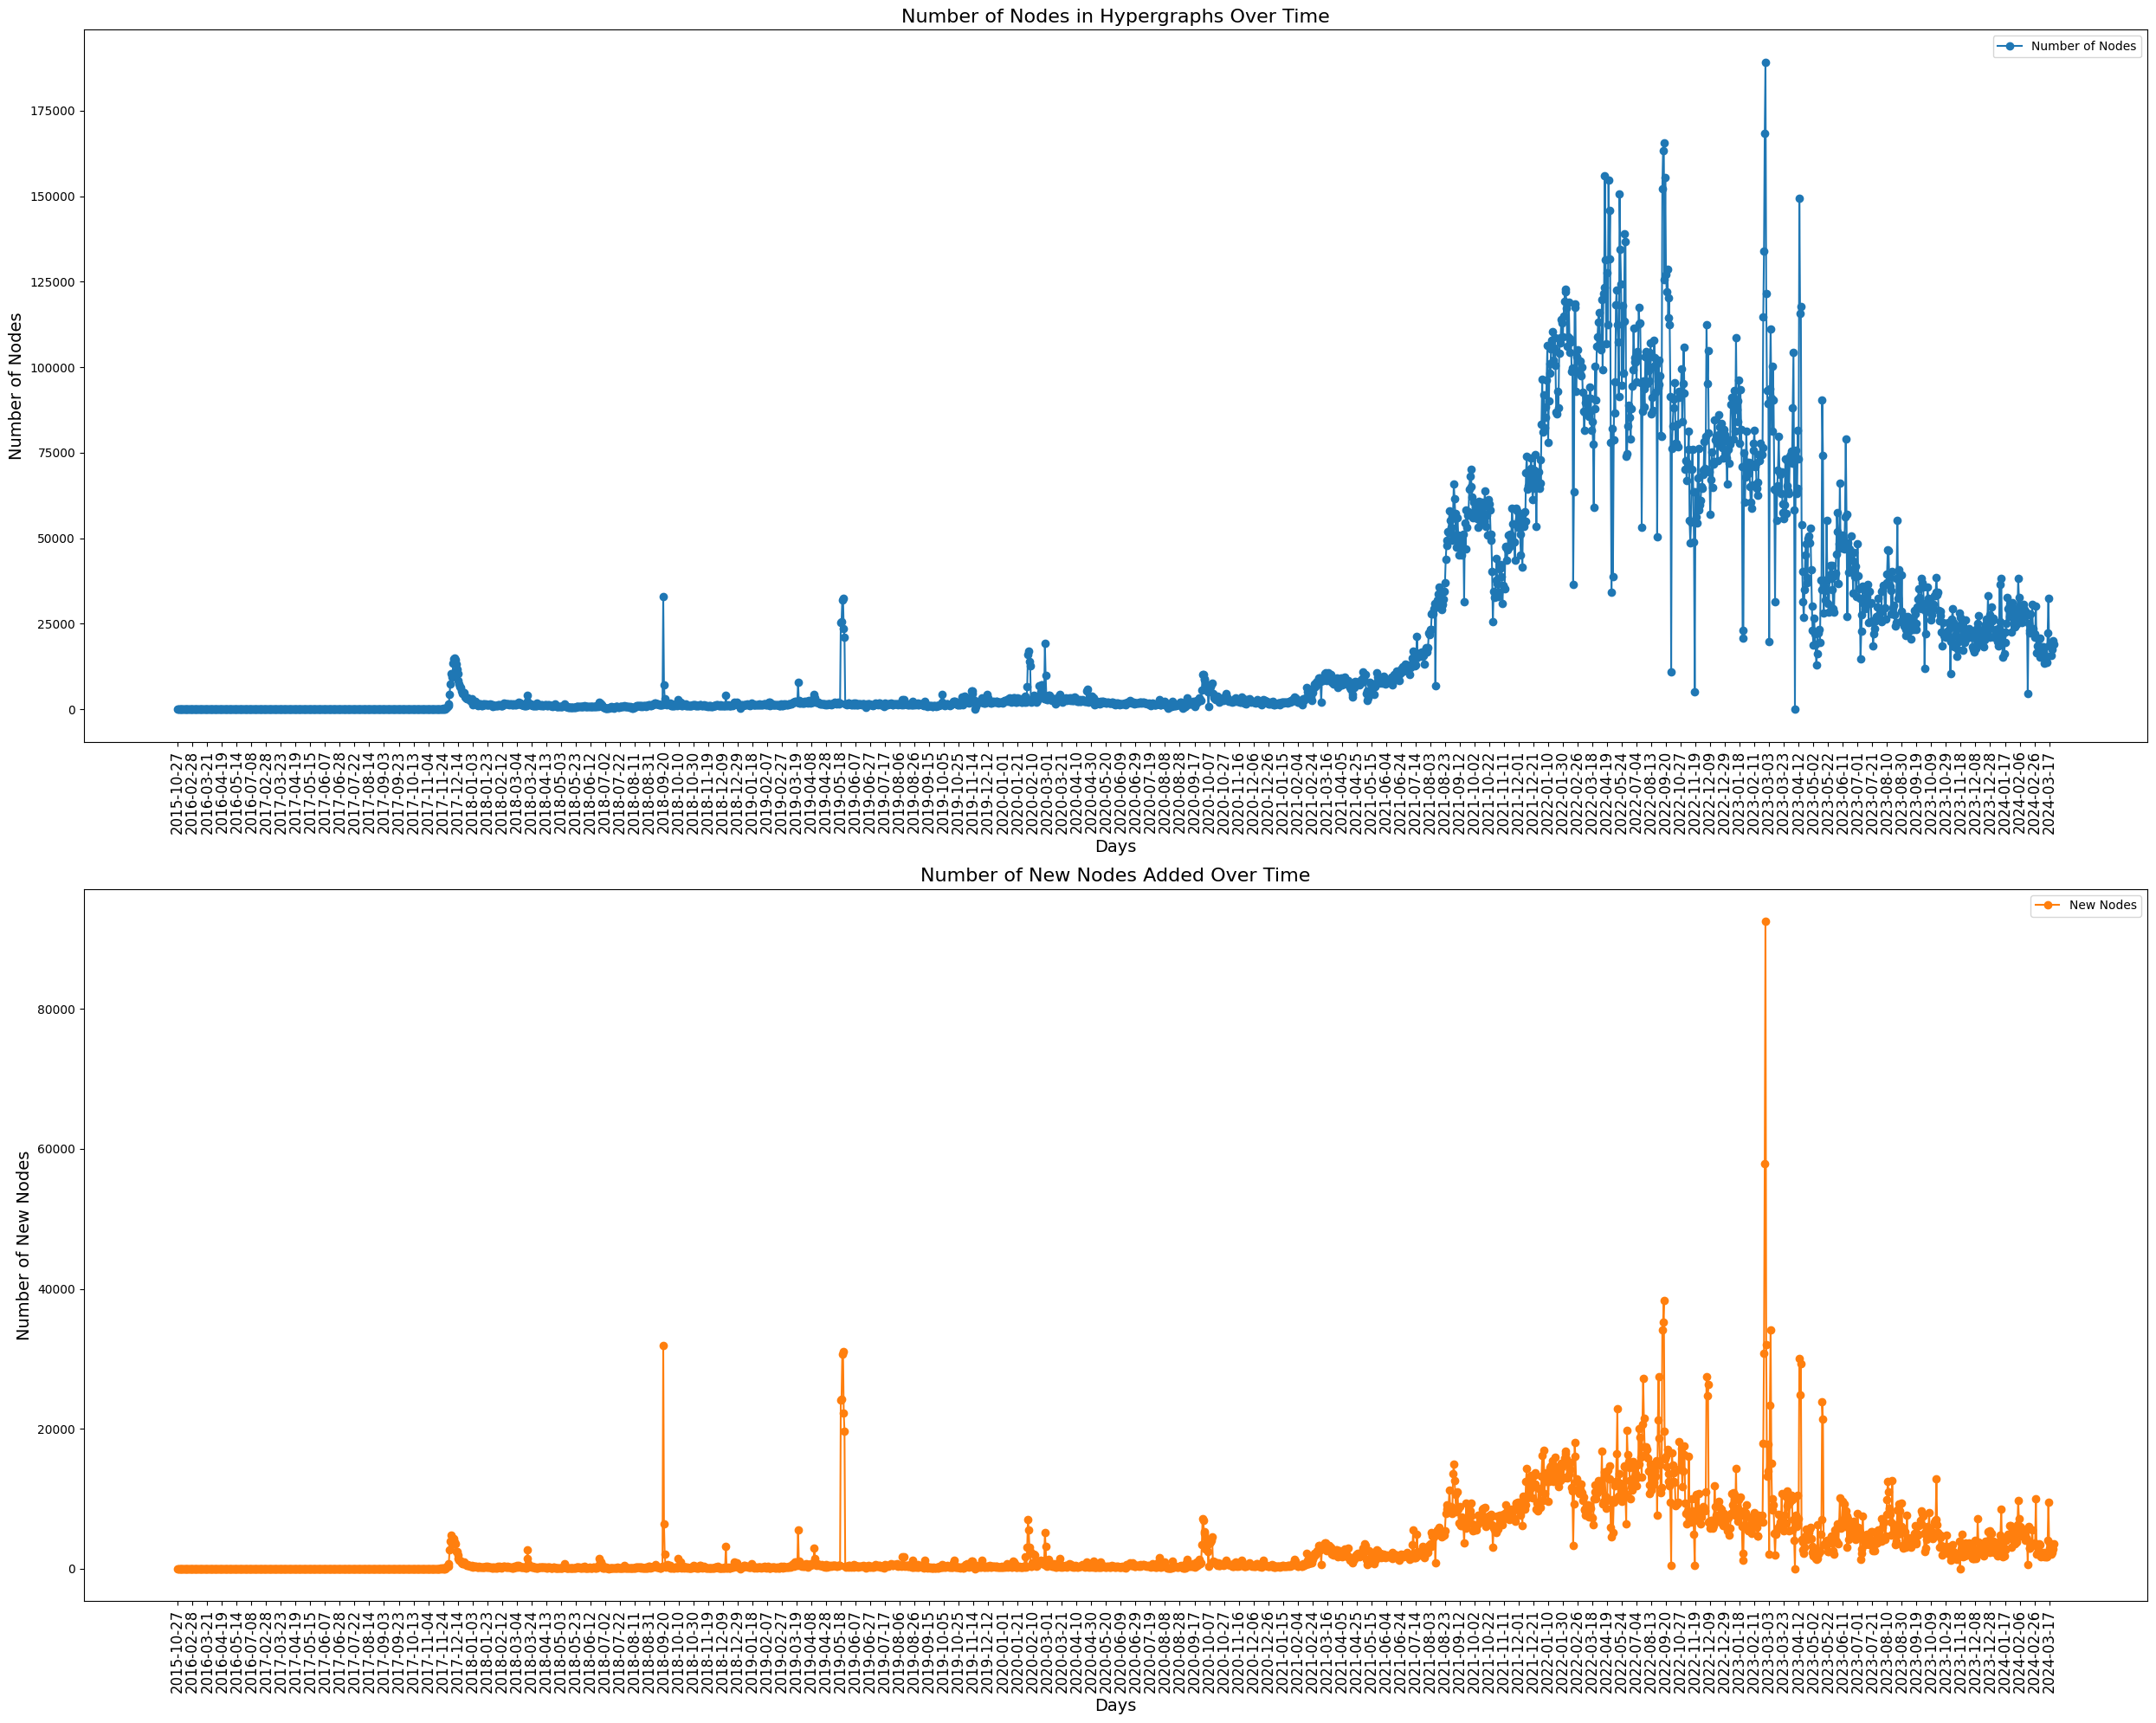

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data for plotting
csv_file_path = r'/home/prio/loc_project/Mini_2_ERC_721/node_results.csv'
df_loaded = pd.read_csv(csv_file_path)
days = df_loaded['Day']
num_nodes = df_loaded['Number_of_Nodes']
num_new_nodes = df_loaded['New_Nodes']

# Plot the number of nodes and new nodes over time in subplots without grid lines
plt.figure(figsize=(25, 20))  # Increase the figure size for better readability

# Plot the number of nodes
plt.subplot(2, 1, 1)
plt.plot(range(len(days)), num_nodes, marker='o', linestyle='-', color='#1f77b4', label='Number of Nodes')
plt.xlabel('Days', fontsize=14)
plt.ylabel('Number of Nodes', fontsize=14)
plt.title('Number of Nodes in Hypergraphs Over Time', fontsize=16)

# Selectively label x-axis ticks
selected_indices = list(range(0, len(days), 20))  # Label every 20th day
plt.xticks(
    ticks=selected_indices,
    labels=[days[idx] for idx in selected_indices],
    fontsize=12,
    rotation=90
)

plt.tight_layout()
plt.legend()

# Plot the number of new nodes
plt.subplot(2, 1, 2)
plt.plot(range(len(days)), num_new_nodes, marker='o', linestyle='-', color='#ff7f0e', label='New Nodes')
plt.xlabel('Days', fontsize=14)
plt.ylabel('Number of New Nodes', fontsize=14)
plt.title('Number of New Nodes Added Over Time', fontsize=16)

# Selectively label x-axis ticks
plt.xticks(
    ticks=selected_indices,
    labels=[days[idx] for idx in selected_indices],
    fontsize=12,
    rotation=90
)

plt.tight_layout()
plt.legend()

# Display the plots
plt.show()


In [3]:
#Node vs Degree
#Here we calculated Degree of Nodes by creating hypergraphs for every single day 
#Degree of node is the no.of unique tokens it transferred in that day 

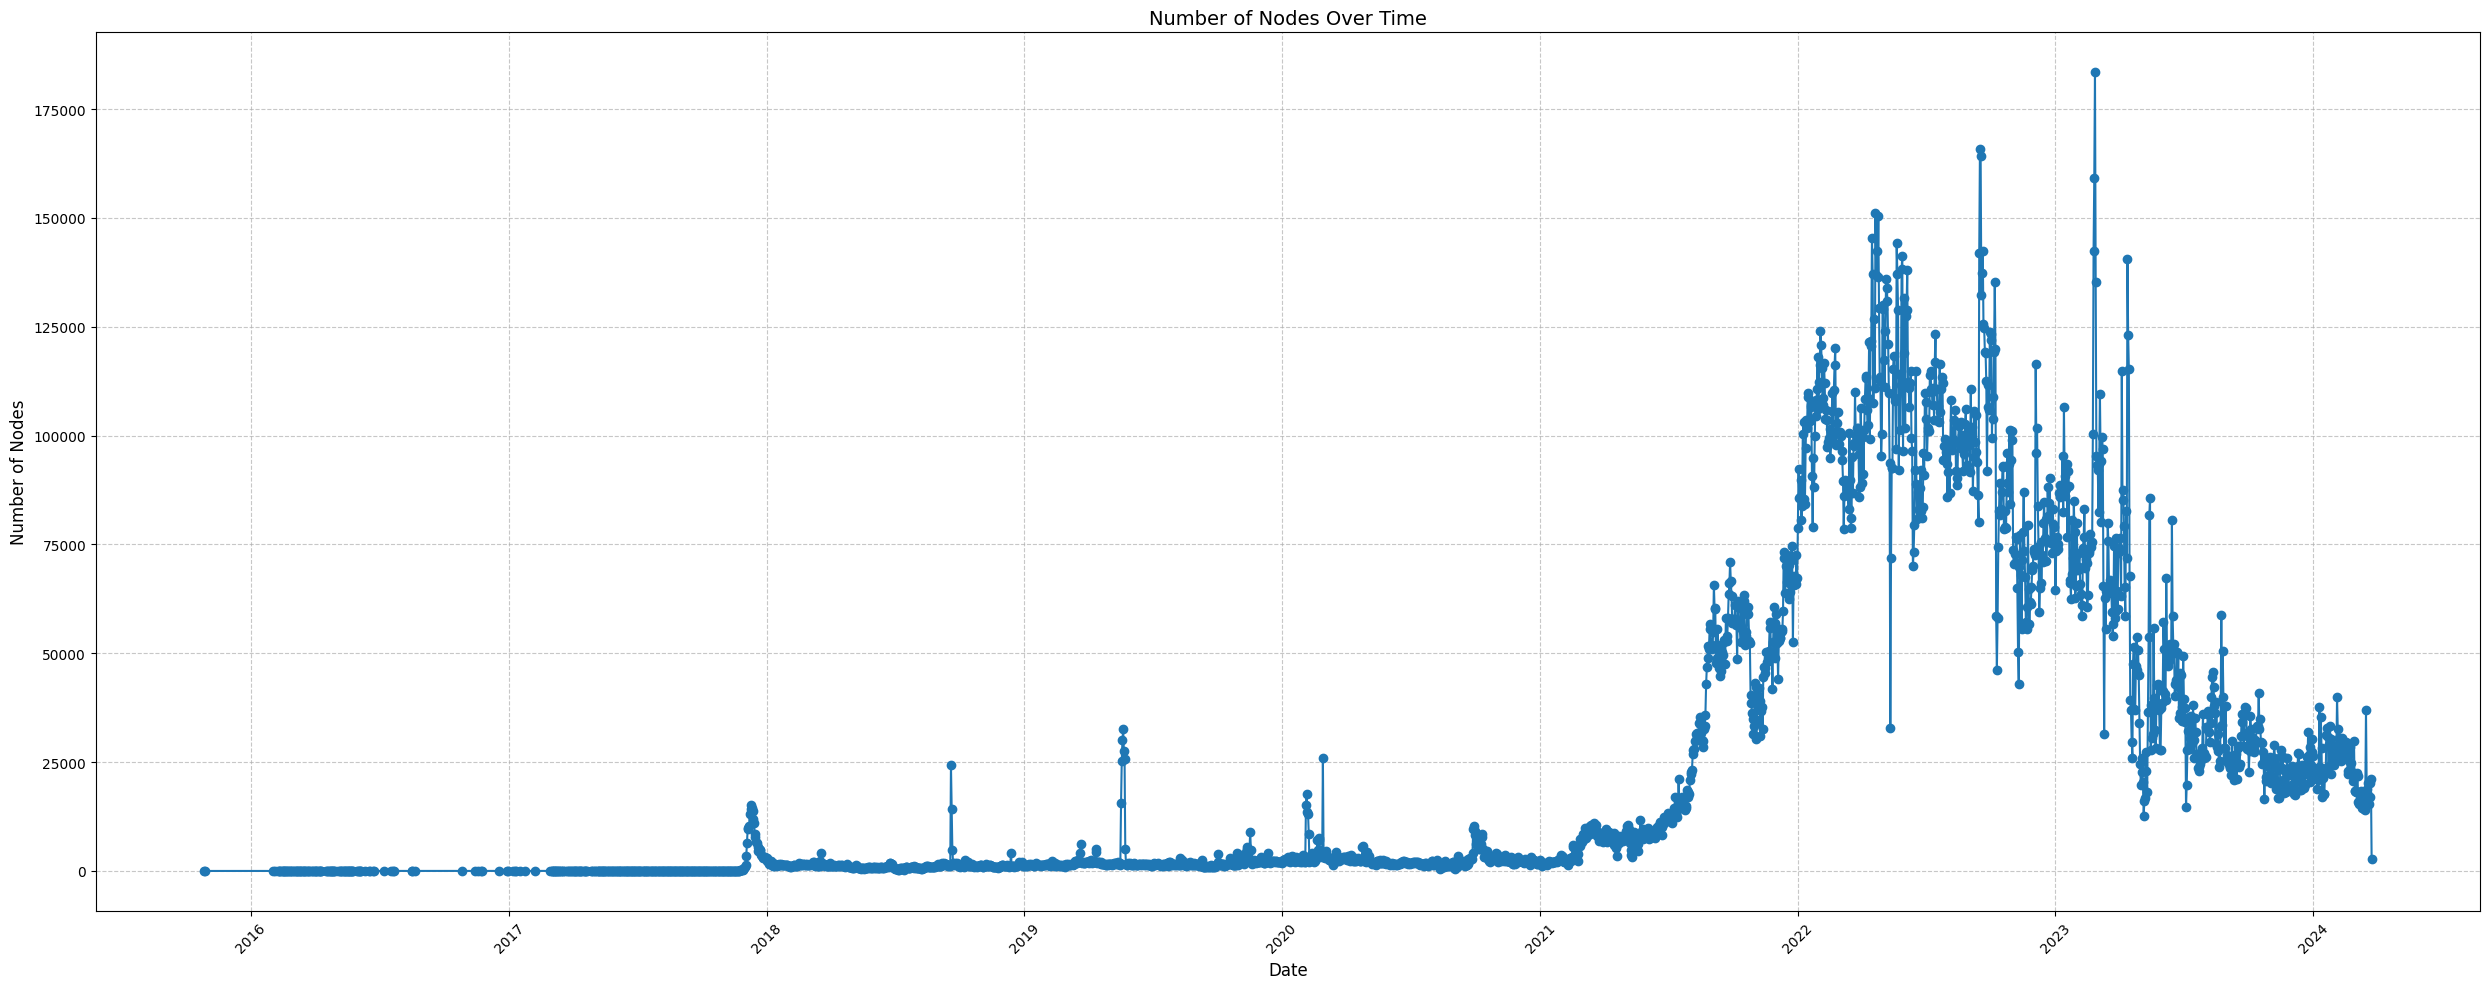

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to your CSV file
csv_file_path = r'C:\Mini Project 2\Plots_Data\num_nodes_per_day.csv'  # Update with your actual path

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Convert the 'Day' column to a datetime format
df['Day'] = pd.to_datetime(df['Day'], format='%Y--%m--%d')

# Plot the data
plt.figure(figsize=(25, 10))
plt.plot(df['Day'], df['Number of Nodes'], marker='o', linestyle='-', color='#1f77b4')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Nodes', fontsize=12)
plt.title('Number of Nodes Over Time', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [6]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 17.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 KB 86.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 50.1 MB/s eta 0:00:0000:01:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 46.5 MB/s eta 0:00:0000:01:00:01


In [ ]:
import os
import pandas as pd
from collections import defaultdict

# Path to the directory containing processed CSV files
processed_files_directory = r"/home/prio/loc_project/Mini_2_ERC_721/labelling_out"

# Initialize a dictionary to hold unique nodes count per day
unique_nodes_per_day = defaultdict(lambda: {'from': set(), 'to': set()})

# Iterate over all files in the directory
for filename in sorted(os.listdir(processed_files_directory)):
    file_path = os.path.join(processed_files_directory, filename)
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # Extract the date
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['Day'] = df['timestamp'].dt.date
    
    # Iterate over rows and update the sets for each day
    for _, row in df.iterrows():
        day = row['Day']
        unique_nodes_per_day[day]['from'].add(row['from'])
        unique_nodes_per_day[day]['to'].add(row['to'])

# Calculate the number of unique nodes per day
unique_nodes_count_per_day = {
    day: {
        'unique_from_count': len(data['from']),
        'unique_to_count': len(data['to']),
        'total_unique_nodes': len(data['from'].union(data['to']))
    }
    for day, data in unique_nodes_per_day.items()
}

# Convert the results to a DataFrame for easier manipulation
result_df = pd.DataFrame.from_dict(unique_nodes_count_per_day, orient='index').reset_index()
result_df.rename(columns={'index': 'Day'}, inplace=True)

# Define the path for saving the result
output_csv_file_path = r"/home/prio/loc_project/Mini_2_ERC_721/unique_nodes_per_day.csv"

# Save the DataFrame to a CSV file
result_df.to_csv(output_csv_file_path, index=False)

print("Unique nodes count per day has been saved to", output_csv_file_path)


In [ ]:
import os
import pandas as pd
import json
from collections import defaultdict

# Path to the directory containing processed CSV files
processed_files_directory = r"/home/prio/loc_project/Mini_2_ERC_721/labelling_out"

# Initialize a dictionary to hold unique nodes count per day
unique_nodes_per_day = defaultdict(lambda: {'from': set(), 'to': set()})

# Iterate over all files in the directory
for filename in sorted(os.listdir(processed_files_directory)):
    file_path = os.path.join(processed_files_directory, filename)
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # Extract the date
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['Day'] = df['timestamp'].dt.date
    
    # Iterate over rows and update the sets for each day
    for _, row in df.iterrows():
        day = row['Day']
        unique_nodes_per_day[day]['from'].add(row['from'])
        unique_nodes_per_day[day]['to'].add(row['to'])

# Calculate the number of unique nodes per day
unique_nodes_count_per_day = {
    str(day): {
        'unique_from_count': len(data['from']),
        'unique_to_count': len(data['to']),
        'total_unique_nodes': len(data['from'].union(data['to']))
    }
    for day, data in unique_nodes_per_day.items()
}

# Define the path for saving the result
output_json_file_path = r"/home/prio/loc_project/Mini_2_ERC_721/unique_nodes_per_day.json"

# Save the results to a JSON file
with open(output_json_file_path, 'w') as json_file:
    json.dump(unique_nodes_count_per_day, json_file, indent=4)

print("Unique nodes count per day has been saved to", output_json_file_path)


New_csv _data